# <font color='purple'>Telecom Churn Case study</font>

### <font color = 'brown' size = 4 >Problem Statment</font>
- In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.<br>


- For many incumbent operators, retaining high profitable customers is the number one business goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, you will analyze customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn.<br>


- In this Case study, our aim is to build a machine learning model that is able to predict churning customers based on the features provided for their usage.

In [10]:
#Data Structures
import pandas as pd
import numpy as np
import re

#Preprocessing
import missingno as msno
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA


# Cross validation
from sklearn.feature_selection import RFECV

#Metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import precision_recall_curve

# Models
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

# Plotting
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

#Others
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [11]:
# Modifying settings to ensure that all the required rows and columns are displayed
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

## Step 1: Reading and Understanding the Data

In [14]:
# Reading the dataframe
data_df = pd.read_csv("train.csv")
unseen_df = pd.read_csv("test.csv")

# Creating a dataframe without id column
data=data_df.drop('id',axis=1)
unseen=unseen_df.drop('id',axis=1)

# Printing the shape of dataframe
print("Shape of Train dataset",data.shape)
print("Shape of Unseen dataset",unseen.shape)

FileNotFoundError: [Errno 2] No such file or directory: 'AB_NYC_2019.csv'

In [5]:
data.head()

NameError: name 'data' is not defined

In [5]:
data.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 171 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   circle_id                 int64  
 1   loc_og_t2o_mou            float64
 2   std_og_t2o_mou            float64
 3   loc_ic_t2o_mou            float64
 4   last_date_of_month_6      object 
 5   last_date_of_month_7      object 
 6   last_date_of_month_8      object 
 7   arpu_6                    float64
 8   arpu_7                    float64
 9   arpu_8                    float64
 10  onnet_mou_6               float64
 11  onnet_mou_7               float64
 12  onnet_mou_8               float64
 13  offnet_mou_6              float64
 14  offnet_mou_7              float64
 15  offnet_mou_8              float64
 16  roam_ic_mou_6             float64
 17  roam_ic_mou_7             float64
 18  roam_ic_mou_8             float64
 19  roam_og_mou_6             float64
 20  roam_og_mou_7             f

In [6]:
data.describe(include="all")

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.0,69297.0,69297.0,69297.0,69999,69600,69266,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,68898,68765,67538,69999.000000,69999.000000,69999.000000,17

**Observations:**
- We can Observe null values in the dataset and few columns have only one value. As this might build an unstable model, we will be handling those null values by imputing or dropping them.
- We also observed that we have only numeric columns and date columns in the dataset. we need the data in a format that allows us to use missing data strategies efficiently for these date variables. Hence, we will be converting them into numeric colums by extracting days.

## Step 2: Cleaning Data

### Step 2.1: Cleaning and converting date columns

In [7]:
# Creating lists of numerical and date columns from the given dataframe
numeric_cols=data.select_dtypes('int64','float64').columns.drop('churn_probability')
date_cols=data.select_dtypes('object').columns

In [8]:
# Printing the date columns from 'data'
data[date_cols]

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
0,6/30/2014,7/31/2014,8/31/2014,6/22/2014,7/10/2014,8/24/2014,NaN,NaN,NaN
1,6/30/2014,7/31/2014,8/31/2014,6/12/2014,7/10/2014,8/26/2014,NaN,7/8/2014,NaN
2,6/30/2014,7/31/2014,8/31/2014,6/11/2014,7/22/2014,8/24/2014,NaN,NaN,NaN
3,6/30/2014,7/31/2014,8/31/2014,6/15/2014,7/21/2014,8/25/2014,NaN,NaN,NaN
4,6/30/2014,7/31/2014,8/31/2014,6/25/2014,7/26/2014,8/30/2014,6/25/2014,7/23/2014,8/20/2014
...,...,...,...,...,...,...,...,...,...
69994,6/30/2014,7/31/2014,8/31/2014,6/18/2014,7/31/2014,8/31/2014,NaN,7/31/2014,8/21/2014
69995,6/30/2014,7/31/2014,8/31/2014,6/28/2014,7/31/2014,8/27/2014,NaN,NaN,NaN
69996,6/30/2014,7/31/2014,8/31/2014,6/25/2014,7/30/2014,8/29/2014,NaN,NaN,NaN
69997,6/30/2014,7/31/2014,8/31/2014,6/29/2014,7/19/2014,8/26/2014,6/17/2014,7/13/2014,8/14/2014


As the columns `last_date_of_month_6`, `last_date_of_month_7`, `last_date_of_month_8` will have the same date there is no variance in the columns. Hence, we will be dropping these columns.

In [9]:
# Dropping the date columns
data.drop(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8'],inplace=True,axis=1)
unseen.drop(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8'],inplace=True,axis=1)

We will calculate the number of days they have not recharged each month by subtracting last date of month and date of last recharge.

In [10]:
# Creating lists for date columns
date_cols=data.select_dtypes('object').columns
jul_aug=data.select_dtypes('object').columns[1:3]

# Converting the date column for july and august to days not recharged
data[jul_aug]=data[jul_aug].apply(lambda x:0 if x is None else 31-pd.to_datetime(x, format='%m/%d/%Y').dt.day).apply(np.int64)
unseen[jul_aug]=unseen[jul_aug].apply(lambda x:0 if x is None else 31-pd.to_datetime(x, format='%m/%d/%Y').dt.day).apply(np.int64)

# Converting the date column for june to days not recharged
data[['date_of_last_rech_6']]=data[['date_of_last_rech_6']].apply(lambda x:0 if x is None else 30-pd.to_datetime(x, format='%m/%d/%Y').dt.day).apply(np.int64)
unseen[['date_of_last_rech_6']]=unseen[['date_of_last_rech_6']].apply(lambda x:0 if x is None else 30-pd.to_datetime(x, format='%m/%d/%Y').dt.day).apply(np.int64)   

For the columns `date_of_last_rech_6`,`date_of_last_rech_7`, `date_of_last_rech_8`, there seems to be a default value populated which is -9223372036854775808. This is due to the calculations perfomed on the missing value. So, we will be imputing this value with mode which is 0

In [11]:
# Replacing default values populated
data[date_cols]=data[date_cols].replace(-9223372036854775808,0)
unseen[date_cols]=unseen[date_cols].replace(-9223372036854775808,0)

In [12]:
# Renaming the columns to 'days_since_last_rech' as we have converted them
data= data.rename(columns={ 'date_of_last_rech_6' : 'days_since_last_rech_6', 'date_of_last_rech_7':'days_since_last_rech_7','date_of_last_rech_8':'days_since_last_rech_8'})
unseen= unseen.rename(columns={ 'date_of_last_rech_6' : 'days_since_last_rech_6', 'date_of_last_rech_7':'days_since_last_rech_7','date_of_last_rech_8':'days_since_last_rech_8'})

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 168 entries, circle_id to churn_probability
dtypes: float64(135), int64(30), object(3)
memory usage: 89.7+ MB


### Step 2.2: Dropping null values in 'data'  and 'unseen' dataframes

In [14]:
# Calculating percentage nulls in data and unseen dataframe
null_data_perc=pd.Series(round(100*(data.isnull().sum()/data.shape[0]),2))
null_unseen_perc=pd.Series(round(100*(unseen.isnull().sum()/unseen.shape[0]),2))

# Calculating null count in data and unseen dataframe
null_data_count=pd.Series(data.isnull().sum())
null_unseen_count=pd.Series(unseen.isnull().sum())

# Create dataframe with null counts and percentages
null_data_df=pd.DataFrame(pd.concat([null_data_count,null_data_perc],axis=1))
null_unseen_df=pd.DataFrame(pd.concat([null_unseen_count,null_unseen_perc],axis=1))

# Rest index of dataframe
null_data_df=null_data_df.reset_index()
null_unseen_df=null_unseen_df.reset_index()

# Assign the column names to the dataframe
null_data_df.columns=['Column Name','Null Counts', 'Null Percentages']
null_unseen_df.columns=['Column Name','Null Counts', 'Null Percentages']

# Sorting the data by percentage nulls
null_data_df.sort_values(by='Null Percentages',ascending=False,inplace=True)
null_unseen_df.sort_values(by='Null Percentages',ascending=False,inplace=True)

# Retaining only those features with percentage greater than 0
null_data_df=null_data_df[null_data_df['Null Counts']>0]
null_unseen_df=null_data_df[null_unseen_df['Null Counts']>0]

In [15]:
# Printing the null percentages dataframe 
null_data_df

,Column Name,Null Counts,Null Percentages
139,arpu_3g_6,52431,74.90
127,count_rech_3g_6,52431,74.90
160,fb_user_6,52431,74.90
145,night_pck_user_6,52431,74.90
118,total_rech_data_6,52431,74.90
121,max_rech_data_6,52431,74.90
124,count_rech_2g_6,52431,74.90
115,date_of_last_rech_data_6,52431,74.90
130,av_rech_amt_data_6,52431,74.90
142,arpu_2g_6,52431,74.90


In [16]:
# Printing the null percentages dataframe 
null_unseen_df

,Column Name,Null Counts,Null Percentages
139,arpu_3g_6,52431,74.90
127,count_rech_3g_6,52431,74.90
160,fb_user_6,52431,74.90
145,night_pck_user_6,52431,74.90
118,total_rech_data_6,52431,74.90
121,max_rech_data_6,52431,74.90
124,count_rech_2g_6,52431,74.90
115,date_of_last_rech_data_6,52431,74.90
130,av_rech_amt_data_6,52431,74.90
142,arpu_2g_6,52431,74.90


<AxesSubplot:>

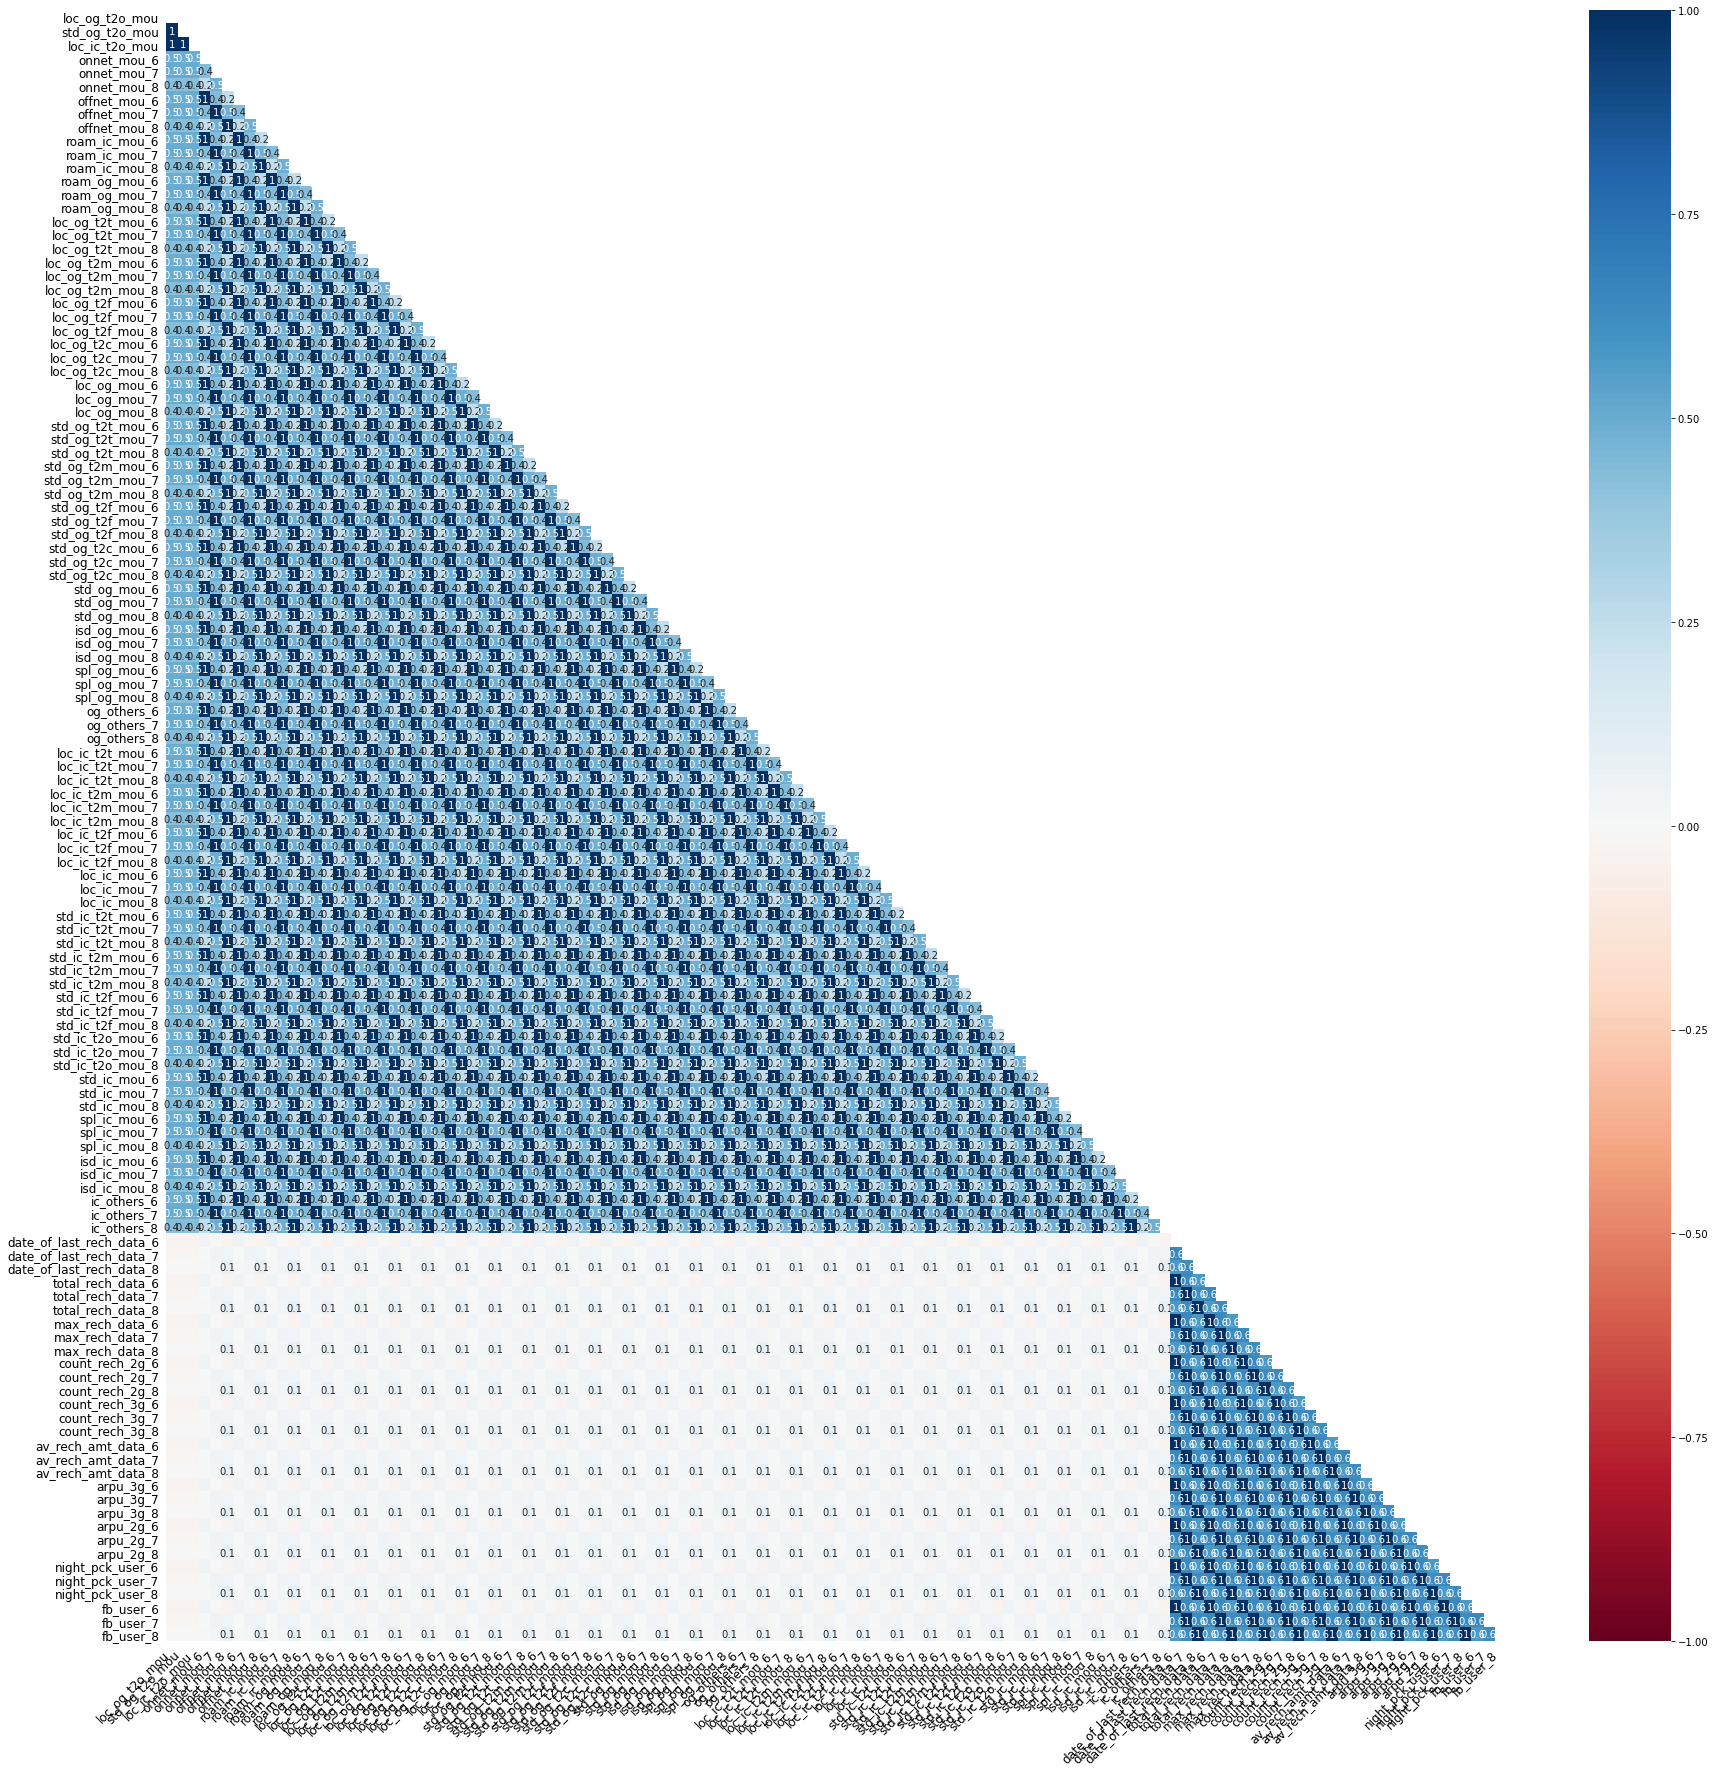

In [17]:
# Plotting bar graph for missing values for 'data'
msno.heatmap(data, figsize=(30,30), fontsize=12)

<AxesSubplot:>

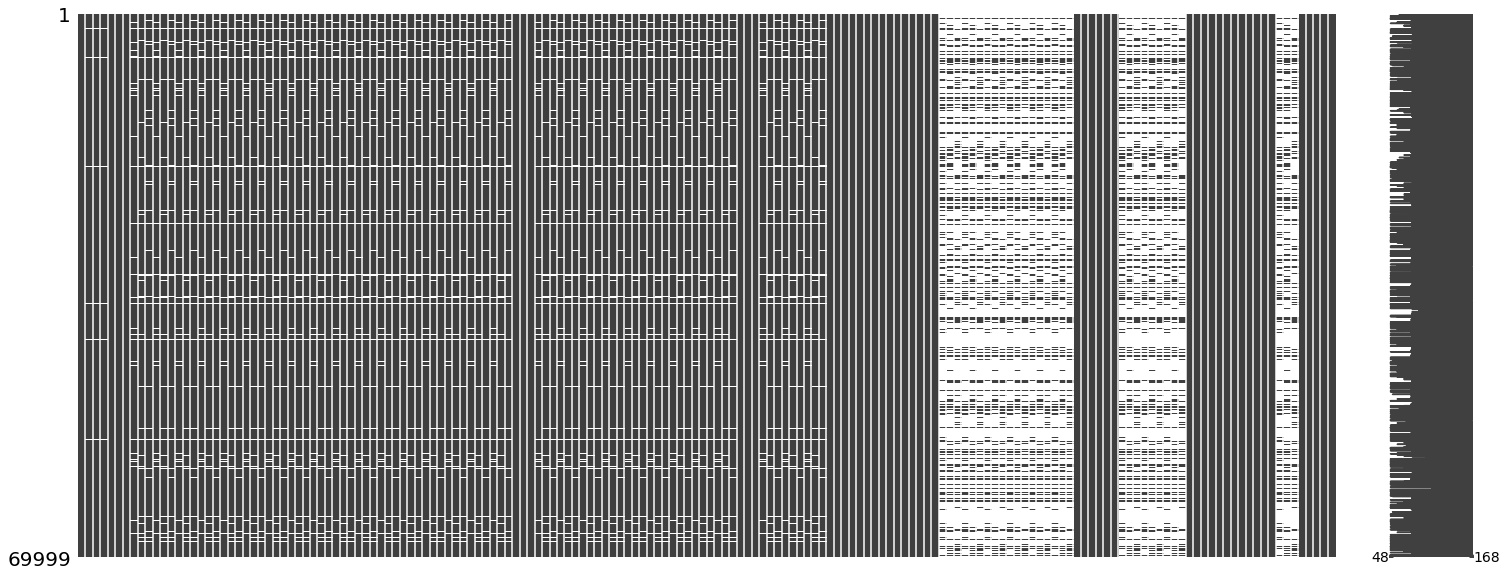

In [18]:
# plotting matrix graph for missing values
msno.matrix(data)

<AxesSubplot:>

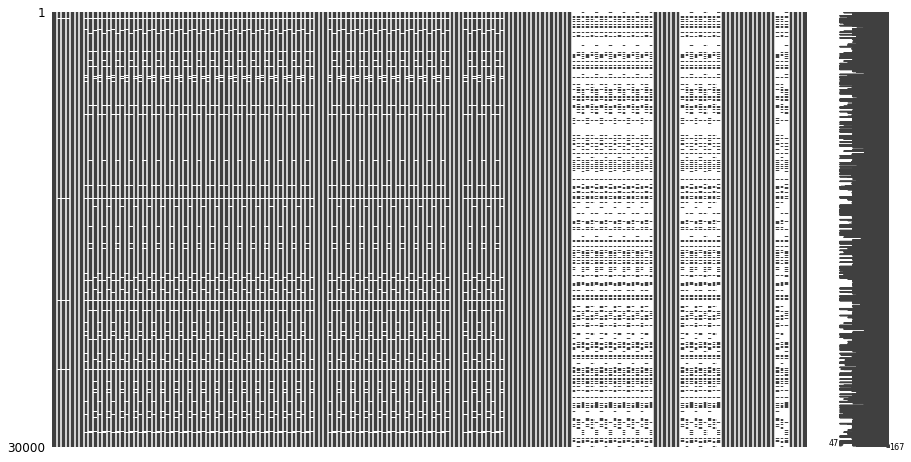

In [19]:
# Plotting bar graph for missing values for unseen dataframe
msno.matrix(unseen, figsize=(15,8), fontsize=10)

**Observations:**
- We can observe that both 'data' and 'unseen' datasets have null values greater than 40%.
- We will be dropping these columns as they would not be of help while building a model.

**Dropping the columns with null percentages greater than 40 percentage**

In [20]:
# Creating a list with columns having null percentages greater than 40%
null_perc_cols_data=null_data_df[null_data_df['Null Percentages']>40]['Column Name'].to_list()
null_perc_cols_unseen=null_unseen_df[null_unseen_df['Null Percentages']>40]['Column Name'].to_list()

# Dropping the columns with null percentages greater than 40%
data.drop(null_perc_cols_data,inplace=True,axis=1)
unseen.drop(null_perc_cols_unseen,inplace=True,axis=1)

In [21]:
# Checking the shape of dataframes after dropping
print("Shape of data dataset",data.shape)
print("Shape of unseen dataset",unseen.shape)

Shape of data dataset (69999, 138)
Shape of unseen dataset (30000, 137)


**Observations:**
- And now the dataframes have less than 40% missing values and all the features are numerical columns.
- From the Matrix we can observe that the data is not missing at random.
- Hence, we would want to flag the missing values with a different (arbitrary) value, instead of replacing those occurrences with the mean or the median. 
- Therefore, we will me imputing the missing values with 0.

In [22]:
# Impute the null values with 0
data=data.fillna(0)
unseen=unseen.fillna(0)

In [23]:
data

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,days_since_last_rech_6,days_since_last_rech_7,days_since_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,109,0.0,0.0,0.0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.00,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.00,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.00,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.00,0.0,0.00,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,8,21,7,65,65,0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,1958,0.00,0.00,0.00,0
1,109,0.0,0.0,0.0,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.00,0.0,0.00,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,18,21,5,0,0,0,0.00,352.91,0.00,0.00,3.96,0.00,0,0,0,0,0,0,0,1,0,0,0,0,710,0.00,0.00,0.00,0
2,109,0.0,0.0,0.0,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.53,12.98,0.00,24.11,0.00,0.00,0.00,0.00,0.00,2.14,0.00,0.00,24.64,12.98,0.00,0.00,2.94,0.00,28.94,82.05,0.00,0.00,0.0,0.0,0.0,0.0,0.0,28.94,84.99,0.00,0.00,0.0,0.0,2.89,1.38,0.00,0.00,0.0,0.0,56.49,99.36,0.00,4.51,6.16,6.49,89.86,25.18,23.51,0.00,0.00,0.00,94.38,31.34,30.01,11.69,0.00,0.00,18.21,2.48,6.38,0.0,0.0,0.00,0.0,0.0,0.0,29.91,2.48,6.38,124.29,33.83,36.64,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.25,2,4,2,70,120,0,70,70,0,19,9,7,70,50,0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,882,0.00,0.00,0.00,0
3,109,0.0,0.0,0.0,156.362,205.260,111.095,7.26,16.01,0.00,68.76,78.48,50.23,0.00,0.0,0.0,0.00,0.0,1.63,6.99,3.

<AxesSubplot:>

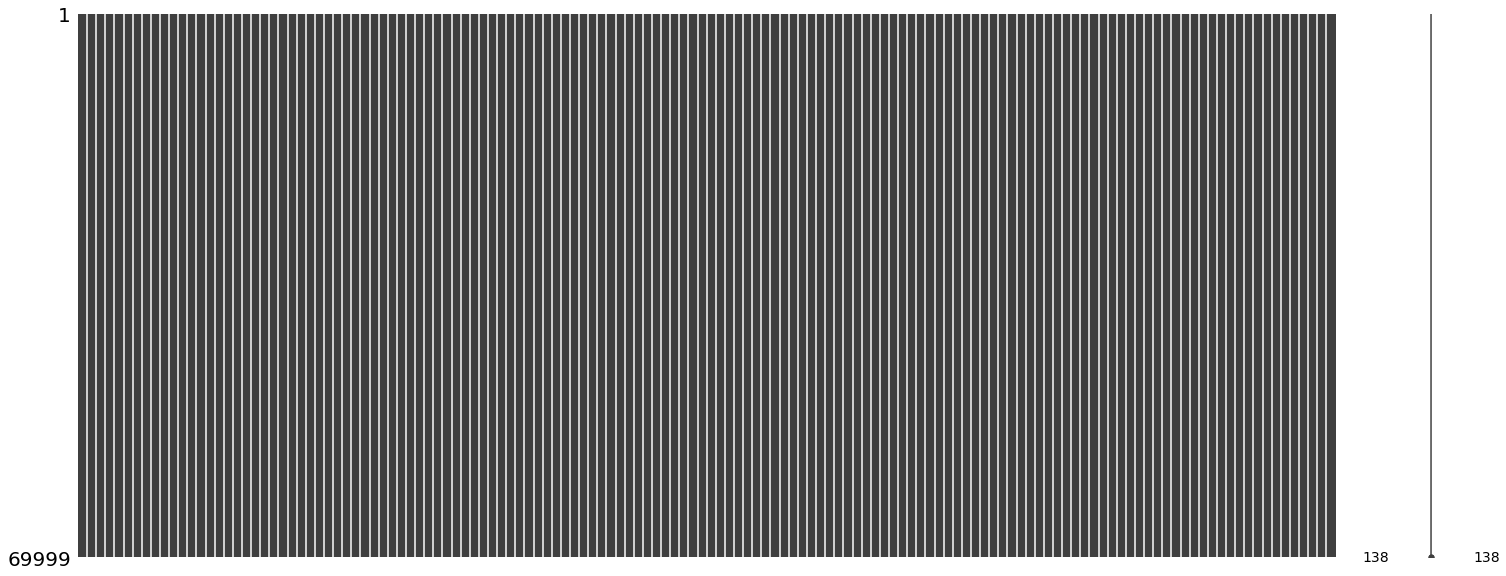

In [24]:
msno.matrix(data)

<AxesSubplot:>

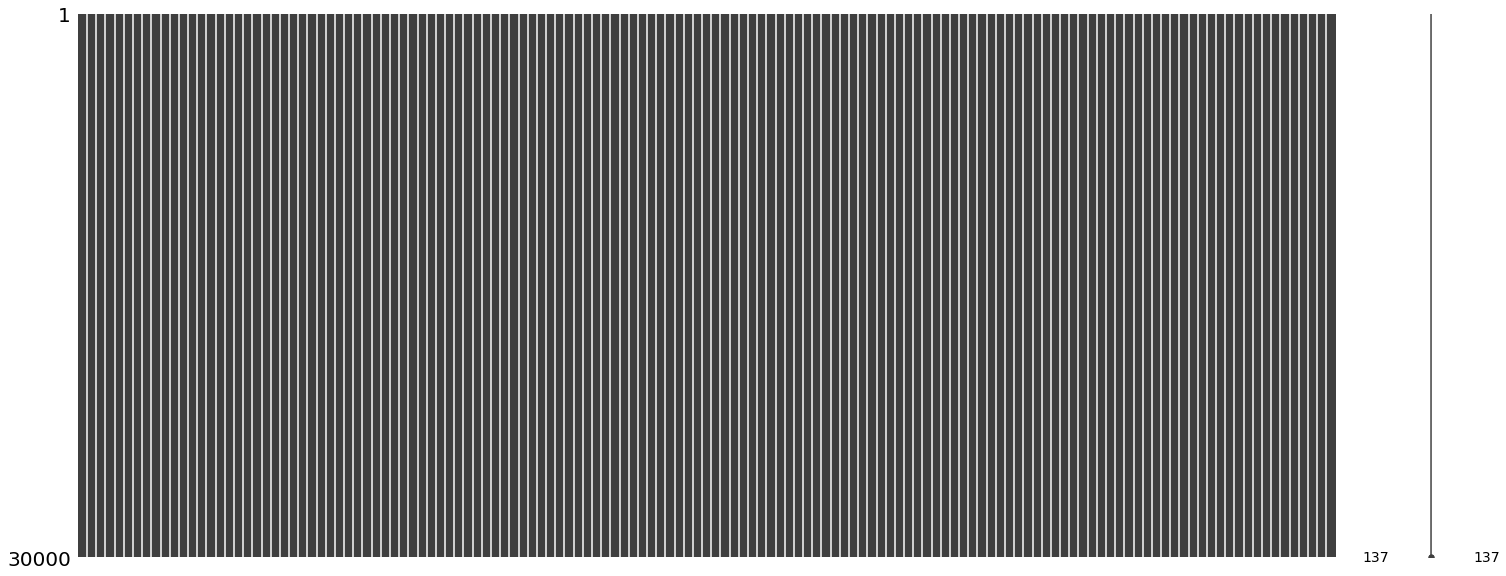

In [25]:
msno.matrix(unseen)

From the above plots we can observe that we dont have any missing values in the dataframe anymore. we can go ahead with other cleaning steps.

### Step 2.3: Checking for columns having only one value.

   - If a column has the same value for every row in the dataset, there would be no variance and such columns would not be useful for model building. Therefore we will identify such columns and remove them.

In [26]:
# Creating a list of columns with only one value for 'data' dataframe
unique_vals_data=data.nunique().reset_index()
unique_vals_data.columns=['column','unique counts']
unique_vals_data=list(unique_vals_data[unique_vals_data['unique counts']==1].column)

# Creating a list of columns with only one value for 'unseen' dataframe
unique_vals_unseen=unseen.nunique().reset_index()
unique_vals_unseen.columns=['column','unique counts']
unique_vals_unseen=list(unique_vals_unseen[unique_vals_unseen['unique counts']==1].column)

In [27]:
# Comparing the lists created for 'data' and 'unseen' dataframe. If they are matching then we can use any of those to drop from the dataframe
unique_vals_data==unique_vals_unseen

True

In [28]:
# Dropping the columns with no variance
data.drop(unique_vals_data,inplace=True,axis=1)
unseen.drop(unique_vals_data,inplace=True,axis=1)

In [29]:
# Printing the shape of datasets after dropping
print("Shape of data dataset",data.shape)
print("Shape of unseen dataset",unseen.shape)

Shape of data dataset (69999, 128)
Shape of unseen dataset (30000, 127)


## Step 3: Exploratory Data Analysis

### Step 3.1: Univariate analysis

<AxesSubplot:>

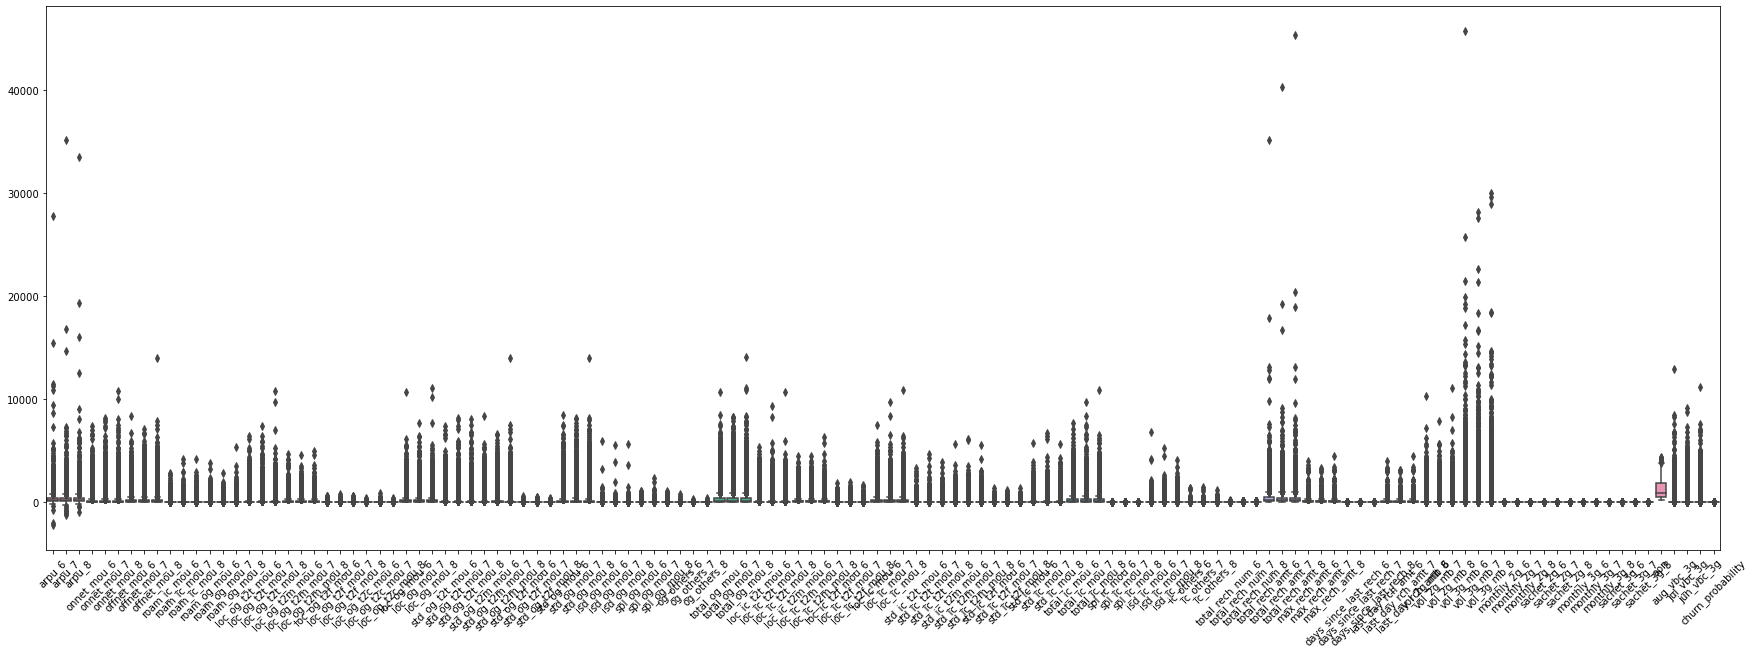

In [30]:
# Plotting a boxplot for 'data' as all features are numerical
plt.figure(figsize=(30,10))
plt.xticks(rotation=45)
plt.ticklabel_format(useOffset=False,style='plain')
sns.boxplot(data = data)

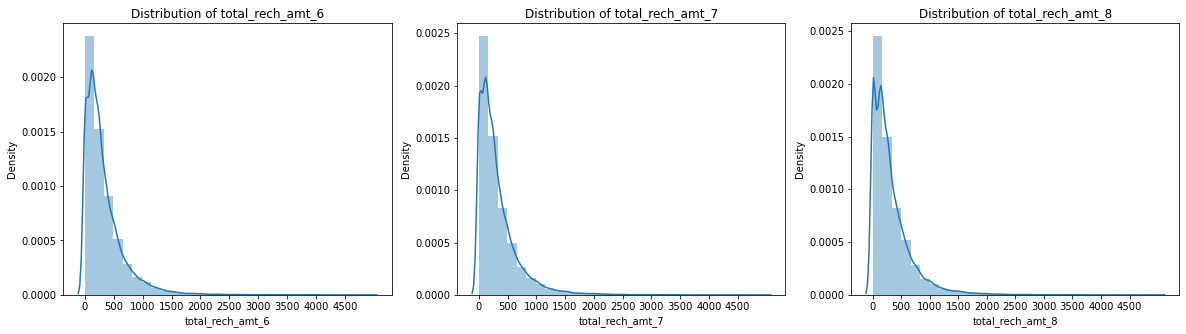

In [31]:
cols_to_plot=['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8']

plt.figure(figsize=(20, 5))

for i in range(0,len(cols_to_plot)):
    # There are three numerical columns, which will be plotted in a 1x3 grid
    plt.subplot(1,3,i+1)
    plt.title('Distribution of '+cols_to_plot[i])
    sns.distplot(data[data[cols_to_plot[i]]<5000][cols_to_plot[i]],bins=30)
    plt.xticks(range(0,5000,500))
plt.show()

**Observations:**
- We can observe that most of the customers recharge amount is less than 1500.
- Number of Customers Recharging more than 1500 is extremely low.
- We can also observe a spike at 0-200. This means that the customers generally recharge with packs or recharge amounts of around 200.

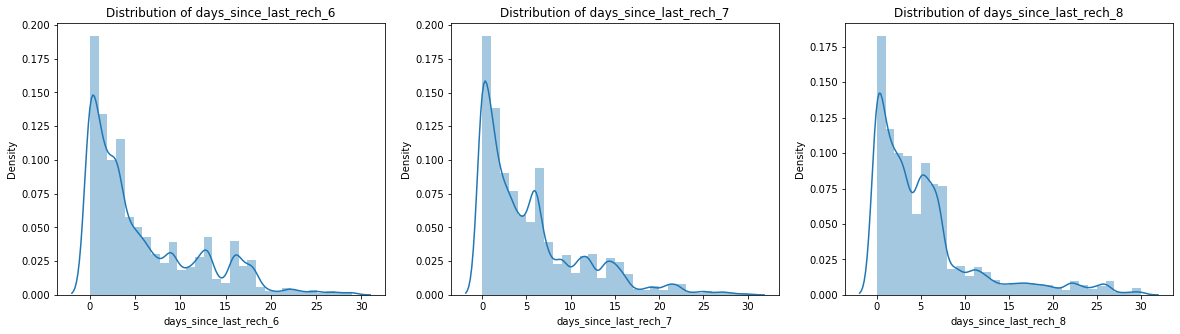

In [32]:
cols_to_plot=['days_since_last_rech_6','days_since_last_rech_7','days_since_last_rech_8']

plt.figure(figsize=(20, 5))

for i in range(0,len(cols_to_plot)):
    # There are three numerical columns, which will be plotted in a 1x3 grid
    plt.subplot(1,3,i+1)
    plt.title('Distribution of '+cols_to_plot[i])
    sns.distplot(data[cols_to_plot[i]],bins=30)
#     plt.xticks(range(0,5000,500))
plt.show()

**Observations:**
- We can observe a spike at 0. which means that most of the customers recharge on end of the month.
- We can also observe a spike close to 5. It means that the recharge is being done mostly in last week of the month.

### 3.2: Bivariate Analysis

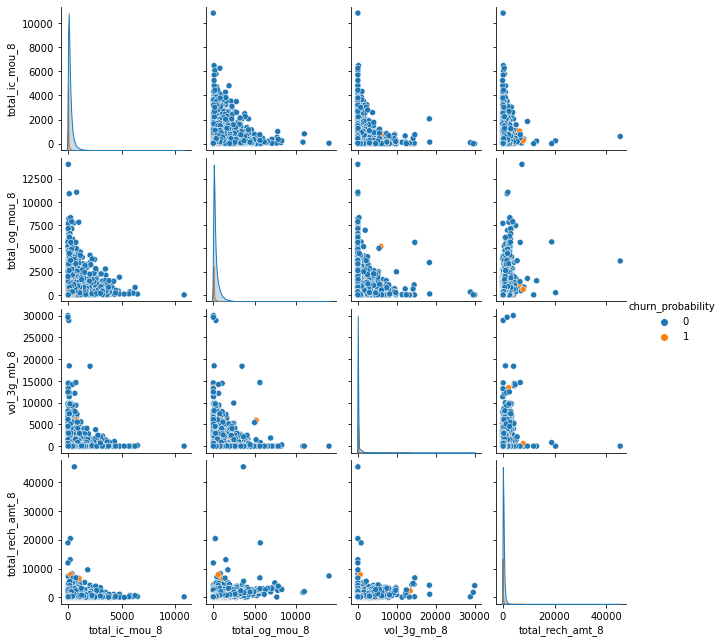

In [33]:
#Creating a list of columns to plot pair plots
cols_to_plot=['total_ic_mou_8','total_og_mou_8','vol_3g_mb_8','total_rech_amt_8']

# Plotting a pairplot to analyze the numeric columns
g = sns.pairplot(data,vars=cols_to_plot,hue='churn_probability')

# Setting the figure size
g.fig.set_size_inches(10,9)
plt.show()

**Observations:**
- We can Observe that though there is increase in minutes of usage for incoming and outgoing calls the amount used for recharge  by customers is slightly decreasing. This might be due to the monthly packs provided by telecom companies, which satisfies all the needs of a telecom customer withought the need of another recharge.
- We can also observe that as the incoming minutes of usage increase the outgoing minutes of usage decreases.
- The differentiation between the customers who churned and didnt churn is hard to visualize from this graph. It seems like there is an imbalance in the dataset.

### Step 3.3: Plotting Correlation Matrix
- As the dataset is huge we will be plotting only a part of it for ease of understanding.

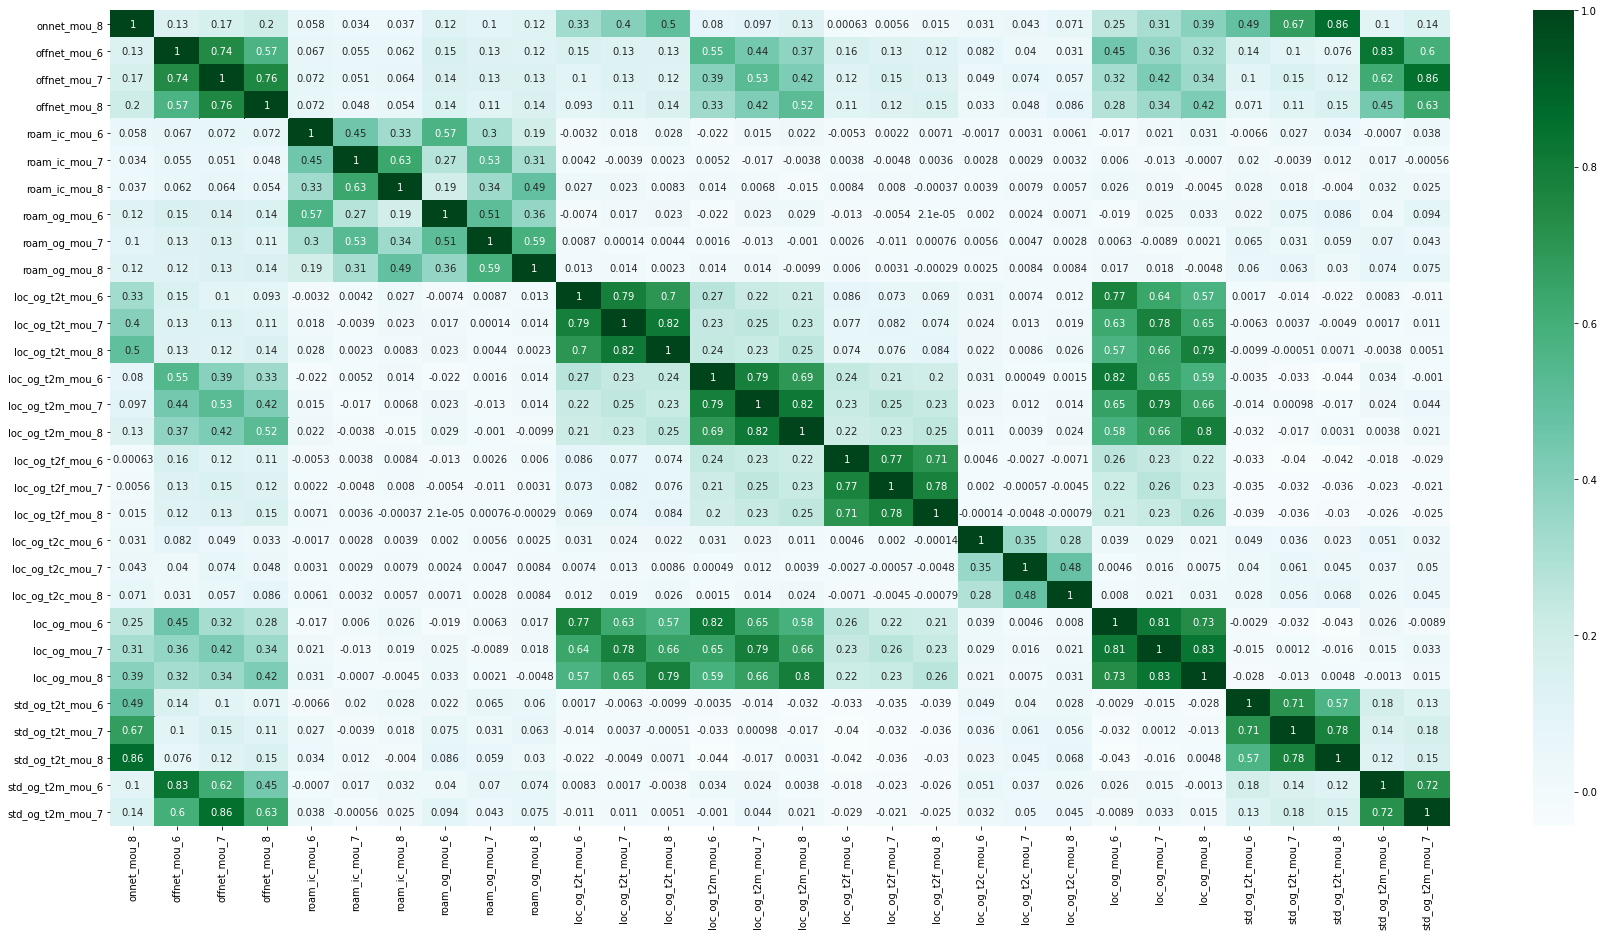

In [34]:
# Plotting the correlation matrix for numerical columns
plt.figure(figsize = (30,15))
sns.heatmap(data[data.columns[5:35]].corr(), annot = True, cmap = 'BuGn')
plt.show()

**Observations:**
- We can observe correlations between the columns. This is because each column refers to one of the months in june/jul/aug. Hence, there will be multicollinearity in the dataset.
- We will not be dropping any columns as of now as we will be using PCA for dimensionality reduction which handles multicollinearity and doesnot lose information as we do while dropping.

### Step 3.4: Handling outliers

- The box plots of these features show there a lot of outliers. We can handle these outliers by capping the values at 0.05 and 0.95

In [35]:
#Creating a funcion to cap outliers
for col in data.columns:
    percentiles = data[col].quantile([0.05, 0.95]).values
    data[col] = np.clip(data[col], percentiles[0], percentiles[1])
    
for col in unseen.columns:
    percentiles = unseen[col].quantile([0.05, 0.95]).values
    unseen[col] = np.clip(unseen[col], percentiles[0], percentiles[1])

**Observations:**
- All the outliers have been capped.
- We can still observe outliers but we will not be making more changes as we dont want to skew the data which might affect the model.

## Step 4: Test-Train Split

In [36]:
# Putting feature variable to X
X = data.drop('churn_probability', axis=1)
X.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,days_since_last_rech_6,days_since_last_rech_7,days_since_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.000,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.000,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.30,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65.0,10,65,65,10,8,16,7,65,65,0,0.000,0.000,0.00,0.0,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1958,0.0,0.0,0.0
1,1.500,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.000,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7.06,7.49,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,22.71,22.951,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145.0,50,0,145,50,18,16,5,0,0,0,0.000,318.672,0.00,0.0,3.96,0.0,0,0,0,0,0,0,0,1,0,0,0,0,710,0.0,0.0,0.0
2,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.000,0.0,0.0,0.00,0.0,0.00,0.53,12.98,0.00,24.11,0.00,0.00,0.00,0.00,0.00,2.14,0.00,0.00,24.64,12.98,0.00,0.00,2.94,0.00,28.94,82.05,0.0,0.00,0.0,0.0,28.94,84.99,0.00,0.0,0.0,0.0,2.89,1.38,0.000,0.00,0.0,0.0,56.49,99.36,0.00,4.51,6.16,6.49,89.86,25.18,23.51,0.00,0.00,0.00,94.38,31.34,30.01,11.69,0.00,0.00,18.21,2.48,6.38,0.0,0.0,0.0,29.91,2.48,6.38,124.29,33.83,36.64,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.25,2,4,2,70,120.0,0,70,70,0,18,9,7,70,50,0,0.000,0.000,0.00,0.0,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,882,0.0,0.0,0.0
3,156.362,205.260,111.095,7.26,16.01,0.00,68.76,78.48,50.23,0.000,0.0,0.0,0.00,0.0,1.63,6.99,3.94,0.00,37.91,44.89,23.63,0.00,0.00,0.00,0.00,0.00,7.49,44.91,48.84,23.63,0.26,12.06,0.00,15.33,25.93,4.6,0.56,0.0,0.0,16.16,37.99,4.60,0.0,0.0,0.0,14.95,9.13,22.951,0.00,0.0,0.0,76.03,95.98,53.84,24.98,4.84,23.88,53.99,44.23,57.14,7.23,0.81,0.00,86.21,49.89,81.03,0.00,0.00,0.00,8.89,0.28,2.81,0.0,0.0,0.0,8.89,0.28,2.81,95.11,50

In [37]:
# Putting response variable to y
y = pd.DataFrame(data['churn_probability'])
y.head()

,churn_probability
0,0
1,0
2,0
3,0
4,0


In [38]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3,stratify=y,random_state=100)

In [39]:
X_train

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,days_since_last_rech_6,days_since_last_rech_7,days_since_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
61966,81.2510,48.8300,112.106,37.71,9.240,8.160,64.36,42.39,71.38,0.00,0.00,0.00,0.00,0.00,0.00,7.59,9.24,8.16,63.09,28.84,60.01,0.00,0.00,0.00,0.00,0.66,0.13,70.69,38.09,68.18,30.110,0.000,0.000,0.000,12.88,6.38,0.0,0.00,0.0,30.110,12.880,6.380,0.0,0.0,0.0,1.26,0.66,0.18,0.00,0.0,0.0,102.080,51.640,79.540,5.45,8.31,0.94,76.93,61.16,73.94,0.00,0.000,1.83,82.38,69.48,76.73,4.040,3.28,0.00,0.63,0.00,0.70,0.43,0.00,0.00,5.11,3.28,0.70,88.36,73.78,81.09,0.41,0.23,0.3,0.0,0.00,3.010,0.28,0.0,0.00,4,4,5,110,0.0,130,110,0,130,3,6,6,0,0,0,0.00,0.00,0.00,0.000,0.000,0.000,0,0,0,0,0,0,0,0,0,0,0,0,504,0.000,0.000,0.000
27769,316.6620,355.3090,270.304,6.09,22.740,7.830,626.51,573.21,272.96,0.00,2.41,5.66,0.00,25.68,22.54,2.51,4.18,5.76,33.94,54.16,41.59,0.35,0.00,2.63,0.00,0.00,0.00,36.81,58.34,49.99,3.580,15.710,2.060,448.681,469.36,206.18,0.0,0.00,0.0,595.790,510.440,208.240,0.0,0.0,0.0,0.00,1.48,0.00,0.00,0.0,0.0,632.610,570.280,258.240,26.46,4.69,14.09,36.51,52.96,32.79,0.00,0.000,5.81,62.98,57.66,52.71,3.590,6.51,6.64,4.54,1.01,23.53,0.00,0.00,0.00,8.14,7.53,30.18,71.13,65.19,147.64,0.00,0.00,0.3,0.0,0.00,27.213,0.00,0.0,0.45,5,7,9,377,427.0,246,110,110,50,3,0,1,110,0,10,0.00,0.00,0.00,0.000,0.000,0.000,0,0,0,0,0,0,0,0,0,0,0,0,919,0.000,0.000,0.000
14848,1.5000,329.1900,137.999,0.00,116.760,20.880,0.00,334.98,115.18,0.11,0.00,0.00,0.00,0.00,0.00,0.00,0.11,3.48,0.00,62.34,17.61,0.00,0.00,0.00,0.00,1.24,0.00,0.00,62.46,21.09,0.000,116.640,17.390,0.000,267.36,96.98,0.0,0.00,0.0,0.000,384.010,114.380,0.0,0.0,0.0,0.43,5.51,0.98,0.00,0.0,0.0,0.430,451.990,137.040,0.00,0.81,3.34,0.00,24.84,21.41,0.00,0.000,0.00,0.00,25.66,24.76,0.000,7.66,12.65,0.00,11.96,0.41,0.00,0.00,0.00,0.00,19.63,13.06,0.00,45.49,38.29,0.00,0.20,0.3,0.0,0.00,0.000,0.00,0.0,0.00,3,9,4,0,386.0,158,0,110,128,4,11,6,0,50,0,0.00,0.00,0.00,0.000,0.000,0.000,0,0,0,0,0,0,0,0,0,0,0,0,229,0.000,0.000,0.000
24960,80.4760,0.9190,163.236,4.49,48.230,35.940,11.03,35.94,112.49,0.00,0.00,0.00,0.00,0.00,0.00,4.49,48.23,35.94,10.04,35.68,105.16,0.00,0.26,2.28,0.00,0.00,0.00,14.54,84.18,143.39,0.000,0.000,0.000,0.000,0.00,5.05,0.0,0.00,0.0,0.000,0.000,5.050,0.0,0.0,0.0,0.9

In [40]:
# Resetting indexes after splitting the dataset
X_train=X_train.reset_index(drop=True)
X_test=X_test.reset_index(drop=True)
y_train=y_train.reset_index(drop=True)
y_test=y_test.reset_index(drop=True)

## Step 5: Feature Scaling

### Step 5.1: Feature Scaling using Standard scaler

In [41]:
# Creating a list of columns present in train dataset
cols=X_train.columns

In [42]:
# Creating a StandardScaler object
scaler = StandardScaler()

# Applying fit_transform on the 'train' dataset
X_train[cols] = scaler.fit_transform(X_train)

# Applying transform on the 'test' and 'unseen' dataset
X_test[cols] = scaler.transform(X_test)
unseen[cols] = scaler.transform(unseen)

In [43]:
# Inspecting the dataframe after scaling
X_train

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,days_since_last_rech_6,days_since_last_rech_7,days_since_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,-0.807645,-0.927749,-0.637918,-0.399250,-0.566909,-0.569063,-0.521650,-0.615834,-0.459812,-0.352062,-0.326054,-0.323237,-0.358628,-0.326039,-0.323036,-0.509802,-0.469124,-0.486960,-0.142395,-0.493163,-0.155064,-0.486470,-0.485076,-0.484076,-0.369759,-0.020615,-0.318341,-0.324263,-0.543515,-0.323510,-0.190101,-0.441900,-0.439217,-0.506263,-0.398154,-0.442217,-0.308136,-0.303983,-0.30047,-0.425154,-0.496754,-0.515692,0.0,0.0,0.0,-0.253295,-0.421753,-0.507584,-0.380812,0.0,0.0,-0.531247,-0.680629,-0.586337,-0.616117,-0.554324,-0.713756,-0.123288,-0.284409,-0.155318,-0.535677,-0.532829,-0.403538,-0.379149,-0.468292,-0.411648,-0.088790,-0.168419,-0.470252,-0.542310,-0.570898,-0.534460,-0.150749,-0.365399,-0.368980,-0.472026,-0.526542,-0.593146,-0.481491,-0.567952,-0.518313,3.074560,3.561693,3.487030,-0.321891,-0.330003,0.130690,0.194969,-0.360735,-0.368283,-0.602813,-0.620901,-0.329812,-0.710447,-1.091993,-0.614098,0.221036,-1.276728,0.431217,-0.462356,0.173770,0.157582,-0.944887,-0.867334,-0.832190,-0.358172,-0.357592,-0.359200,-0.345505,-0.352144,-0.36063,-0.279693,-0.287672,-0.282356,-0.364226,-0.350952,-0.361236,-0.244268,-0.242008,-0.252511,0.0,0.0,0.0,-0.766874,-0.351786,-0.342956,-0.336128
1,0.237966,0.435920,0.057067,-0.599046,-0.482992,-0.571155,2.367146,2.063708,0.570176,-0.352062,0.133066,0.731390,-0.358628,2.281851,2.051728,-0.619110,-0.580185,-0.540072,-0.445202,-0.223727,-0.351179,-0.413854,-0.485076,0.084746,-0.369759,-0.380921,-0.385192,-0.557653,-0.401172,-0.452013,-0.416087,-0.316119,-0.422266,3.265553,3.260668,1.172611,-0.308136,-0.303983,-0.30047,1.945192,1.492239,0.300915,0.0,0.0,0.0,-0.499670,-0.289127,-0.536244,-0.380812,0.0,0.0,1.120630,0.895030,-0.036609,-0.160394,-0.633287,-0.421032,-0.525295,-0.367055,-0.565739,-0.535677,-0.532829,-0.120729,-0.504820,-0.545853,-0.568866,-0.131926,0.134671,0.159940,-0.368511,-0.527814,0.467491,-0.364455,-0.365399,-0.368980,-0.384551,-0.408792,0.247715,-0.574903,-0.614314,-0.156421,-0.445164,-0.321972,3.487030,-0.321891,-0.330003,3.784584,-0.373070,-0.360735,0.450747,-0.406563,-0.046457,0.433050,0.268527,0.476875,-0.192117,0.221036,0.223418,-0.606544,-0.4623

<AxesSubplot:>

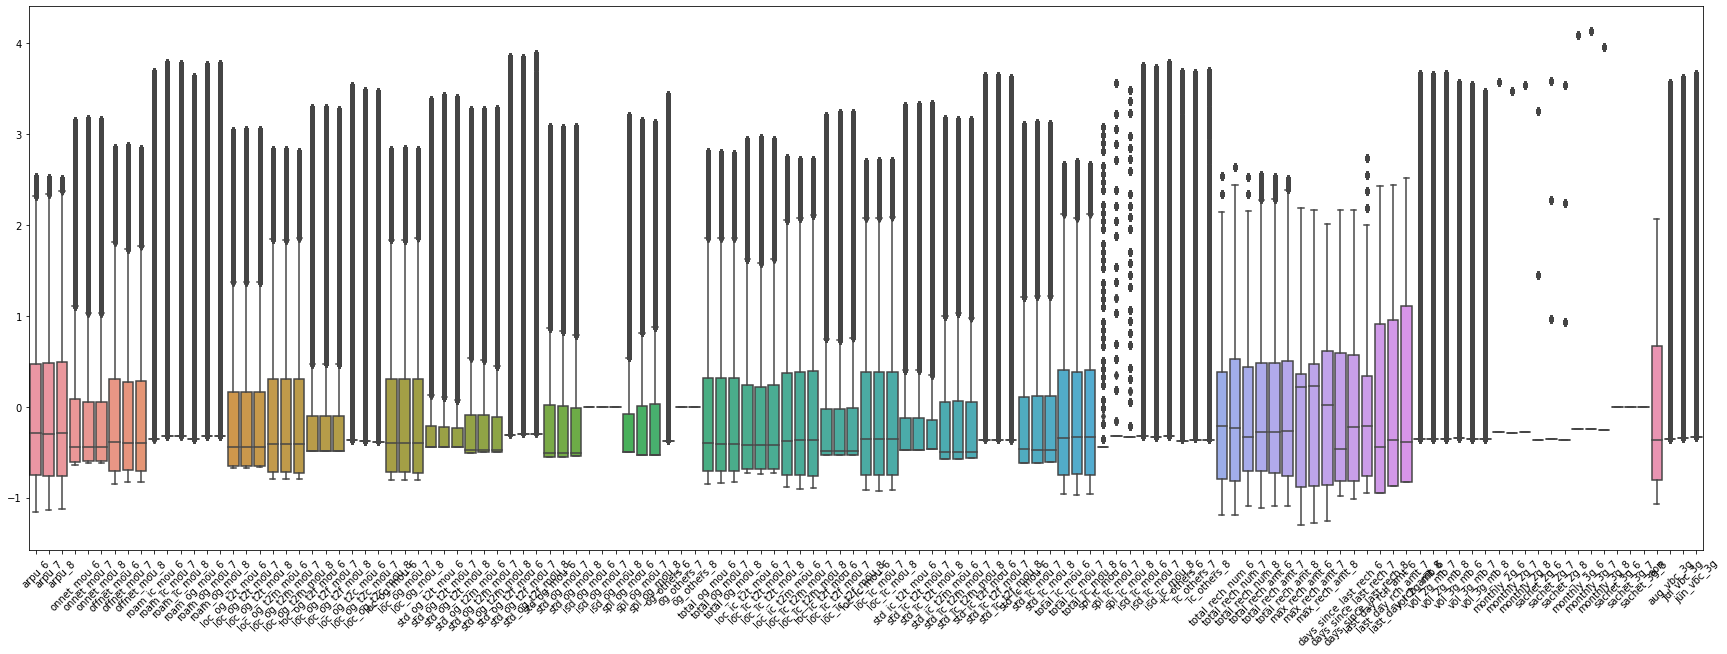

In [44]:
# Plotting a boxplot for 'data' as all features are numerical
plt.figure(figsize=(30,10))
plt.xticks(rotation=45)
plt.ticklabel_format(useOffset=False,style='plain')
sns.boxplot(data = X_train)

## Step 6: Checking for imbalance in target column

In [45]:
# Function to create pieplot to show imbalance in dataframe
def pieplot(dfname, colname, coldesc, column_labels = None):
    plt.figure(figsize=(8,8))
    plt.title(coldesc, fontdict = {'fontsize':16})
    if column_labels is None:
        column_labels = pd.Series(list(dfname[colname].value_counts().index))
    dfname[colname].value_counts().plot.pie(labels = column_labels, label = '', shadow = True, autopct='%1.1f%%', pctdistance=0.65, colors = ['lightblue','seagreen'] )
    plt.legend()
    plt.show()

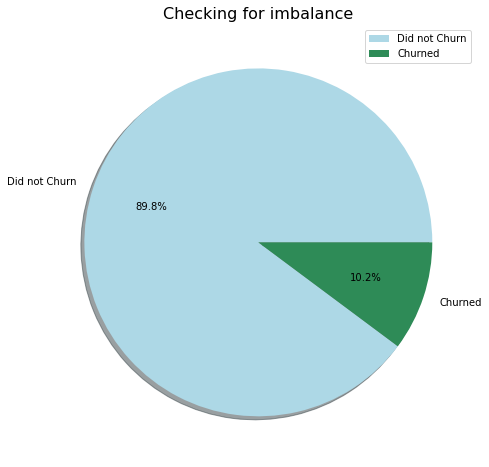

In [46]:
# Plotting a pie-chart for the target variable to check for imbalance
pieplot(data, 'churn_probability', 'Checking for imbalance', column_labels = ['Did not Churn','Churned'])

**Observations**:
- We can say than the data is moderately imbalanced.
- We have not used any class imbalance techniques as the unseen data might also be highly imbalanced which might affect the metrics.

## <font color='purple'>Section 1: Building a model using PCA to make predictions</font>

## Step 7: Model Building

### Step 7.1: Performing PCA for dimensionality reduction

In [47]:
# Checking the shape of train dataset before applying PCA
X_train.shape

(48999, 127)

In [48]:
# Creating a PCA object
pca_1 = PCA(random_state=42)

In [49]:
# Applying fit on train dataset
pca_1.fit(X_train)

PCA(random_state=42)

In [50]:
# Checking the components of PCA
pca_1.components_

array([[ 1.55791872e-01,  1.69333897e-01,  1.60223978e-01, ...,
         4.24203996e-02,  4.20864320e-02,  3.92954861e-02],
       [ 5.97263410e-02,  8.02893107e-02,  6.99765945e-02, ...,
        -6.14094750e-02, -6.31779225e-02, -6.24639182e-02],
       [ 7.35783777e-02,  8.43317067e-02,  8.50657479e-02, ...,
         2.69218625e-01,  2.73118697e-01,  2.60172607e-01],
       ...,
       [ 0.00000000e+00, -2.96732850e-17, -7.46562378e-18, ...,
        -1.90413121e-17,  3.99320500e-17, -2.01898409e-17],
       [ 0.00000000e+00, -1.28405672e-19,  6.07014508e-18, ...,
        -1.31147300e-18, -3.14715136e-18,  7.51302949e-18],
       [-0.00000000e+00, -2.88387434e-18,  1.09178668e-17, ...,
        -1.96252599e-17,  6.28044556e-17, -3.95357129e-17]])

Looking at the explained variance ratio for each component

In [51]:
# Checking the explained_variance_ratio for PCA for all columns in dataframe
pca_1.explained_variance_ratio_

array([1.82061162e-01, 9.74454956e-02, 5.83704743e-02, 4.60281729e-02,
       3.92444516e-02, 3.31806834e-02, 2.86046328e-02, 2.54005350e-02,
       2.33990545e-02, 2.10635360e-02, 1.99783830e-02, 1.91252157e-02,
       1.80744066e-02, 1.53689064e-02, 1.50536384e-02, 1.45236986e-02,
       1.38900636e-02, 1.30793832e-02, 1.22826022e-02, 1.04251344e-02,
       9.86146668e-03, 9.20370883e-03, 9.02976563e-03, 8.70812482e-03,
       8.43404490e-03, 8.20639408e-03, 7.96134757e-03, 7.63185917e-03,
       7.49164854e-03, 7.33400515e-03, 7.27828521e-03, 7.03844244e-03,
       6.67756804e-03, 6.43153740e-03, 6.29877086e-03, 6.10346579e-03,
       5.92673169e-03, 5.49786824e-03, 5.42176911e-03, 5.20994174e-03,
       5.16260658e-03, 5.07775932e-03, 4.94620563e-03, 4.75337645e-03,
       4.69245766e-03, 4.46008950e-03, 4.42817471e-03, 4.39368800e-03,
       4.20078081e-03, 4.18171133e-03, 4.08472334e-03, 4.00168862e-03,
       3.97096914e-03, 3.86792435e-03, 3.47210639e-03, 3.44624842e-03,
      

Text(0.5, 0, 'Principal Component')

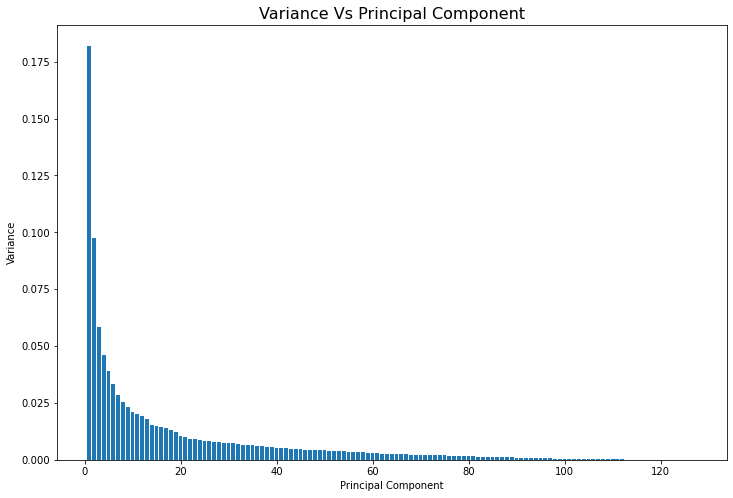

In [52]:
# Plotting the variance of the components created by PCA
fig = plt.figure(figsize=[12,8])
plt.bar(range(1,len(pca_1.explained_variance_ratio_)+1), pca_1.explained_variance_ratio_)
plt.title('Variance Vs Principal Component', fontdict = {'fontsize':16})
plt.ylabel("Variance")
plt.xlabel("Principal Component")

**Observations:**
- We can observe from the graph that around 60 principal components explain a great part of variance in the dataset.
- The remaining components have little to no variance and the variance decreases after 60.

**Making a scree plot for the explained variance**

In [53]:
# Performing a cumulative summation of variance explained by components
var_cumu = np.cumsum(pca_1.explained_variance_ratio_)

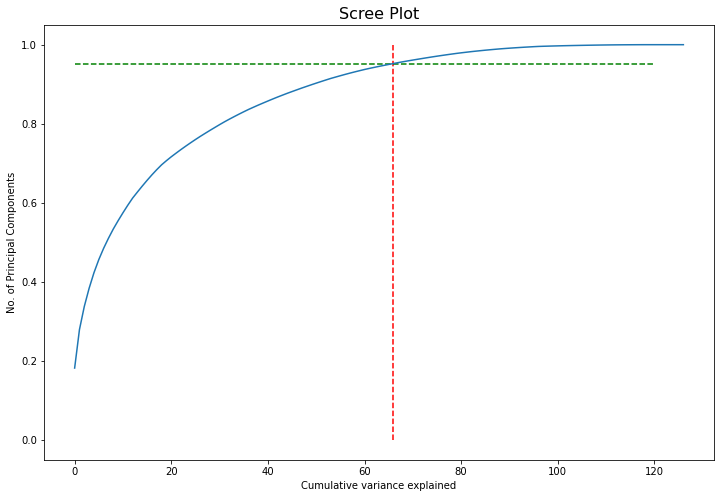

In [54]:
# Plotting a graph with components and the cumulative variance explained by them
fig = plt.figure(figsize=[12,8])
plt.vlines(x=66, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=120, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.title('Scree Plot', fontdict = {'fontsize':16})
plt.xlabel("Cumulative variance explained")
plt.ylabel("No. of Principal Components")
plt.show()

**Observations:**
- We can observe that 95% of variance can be explained by 60 principal components.
- We initially had 127 columns and now we can use only 60 components for model building which is an advantage with PCA.
- Dimensionality reduced by half after performing PCA and we could retain 95% of information.

### Step 7.2: Performing IncrementalPCA with 66 components

In [55]:
# Performing IncrementalPCA with 66 components
pca_2 = IncrementalPCA(n_components=66)

In [56]:
# Applying fit_transform on train dataset
X_train_pca2 = pca_2.fit_transform(X_train)

In [57]:
# Checking the shape after applying PCA
X_train_pca2.shape

(48999, 66)

<AxesSubplot:>

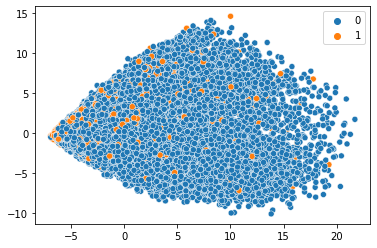

In [58]:
# Plotting a graph between first component and second component with hue as target
sns.scatterplot(x=X_train_pca2[:,0], y=X_train_pca2[:,1], hue=y_train.to_numpy().reshape(-1,))

<AxesSubplot:>

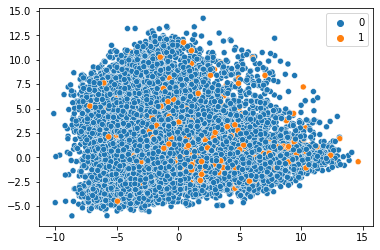

In [59]:
# Plotting a graph between second component and third component with hue as target
sns.scatterplot(x=X_train_pca2[:,1], y=X_train_pca2[:,2], hue=y_train.to_numpy().reshape(-1,))

<AxesSubplot:>

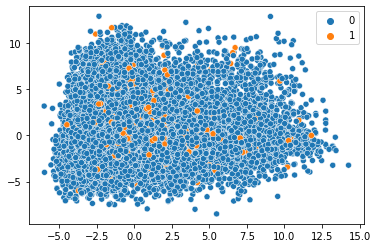

In [60]:
# Plotting a graph between third component and fourth component with hue as target
sns.scatterplot(x=X_train_pca2[:,2], y=X_train_pca2[:,3], hue=y_train.to_numpy().reshape(-1,))

In [61]:
# Creating a correlation matrix on the PCA train dataset
corrmat = np.corrcoef(X_train_pca2.transpose())

In [62]:
corrmat.shape

(66, 66)

<AxesSubplot:>

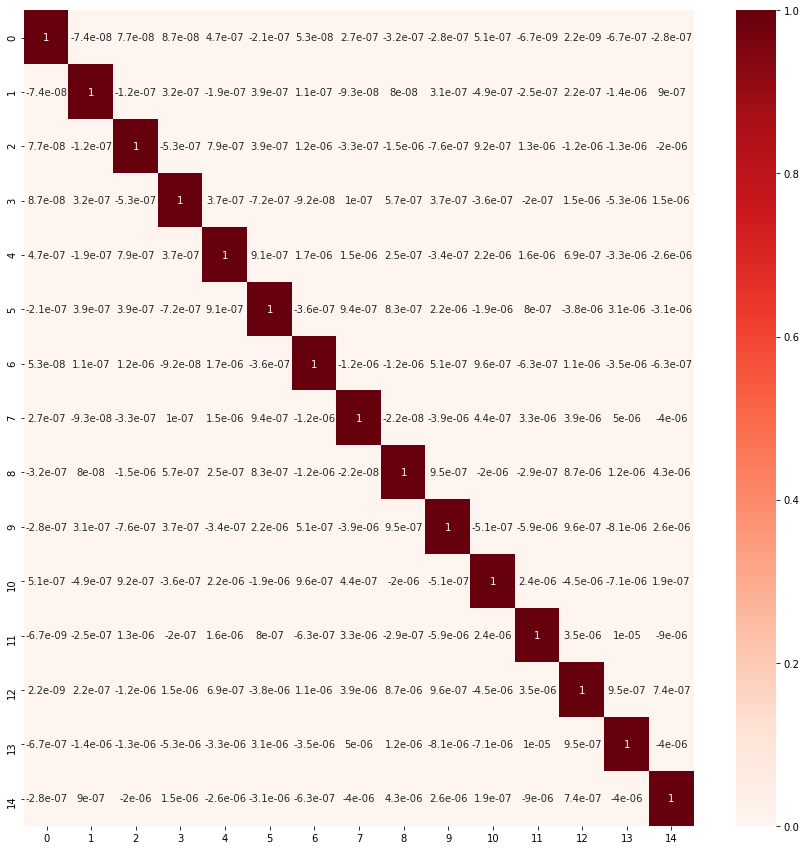

In [63]:
plt.figure(figsize=[15,15])
sns.heatmap(corrmat[:15,:15], annot=True,cmap='Reds',fmt='.2g')

**Observations:**
- We can observe that no boxes appear dark i.e. there is no significant correlation.
- This is because PCA removes multicollinearity between the features. Hence, the features will not have any correlation with each other.

**Applying the PCA transformation on the test set**

In [64]:
# Applying PCA Transform on test dataset
X_test_pca2 = pca_2.transform(X_test)
X_test_pca2.shape

(21000, 66)

### Step 7.3: Applying Logistic Regression on PCA dataset

In [65]:
# Creating a funcion to fill the column names for the principal componenets created
def col_fill(length):
    l=[]
    for i in range(0,length):
        l=l+['PC'+str(i)]
    return l

In [66]:
# Converting the pca transformed arrays to pandas dataframes
X_train_final=pd.DataFrame(X_train_pca2)
X_test_final=pd.DataFrame(X_test_pca2)

# Filling the column name for the dataframes created
X_train_final.columns=col_fill(X_train_pca2.shape[1])
X_test_final.columns=col_fill(X_test_pca2.shape[1])

In [67]:
# Checking if the columns name have been filled
X_test_final

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60,PC61,PC62,PC63,PC64,PC65
0,-0.500606,-2.163925,-1.344104,-0.994900,-0.999755,0.200334,0.790204,0.326492,-0.791731,-0.442403,-0.384804,-1.266106,-0.261581,1.431434,-0.897268,-0.398864,-0.905278,-0.631518,-0.613854,1.540379,0.436857,0.182714,-0.935903,-0.319209,-0.124347,0.889014,1.354157,0.759318,-1.170246,0.272041,-0.481038,-0.104904,-0.222057,-0.642917,-0.468235,1.081986,0.225526,-0.349757,0.201582,-0.629937,-0.660745,1.408482,-1.607381,-0.189961,0.443703,-0.777832,0.295146,0.006069,-0.557691,-0.215102,-0.242401,0.204392,-2.003736,0.478856,0.347832,-0.107603,0.108037,0.115362,0.096842,-0.326145,-0.199471,0.018365,-0.375578,0.085671,0.274766,0.227507
1,-5.443830,-0.772778,2.723575,-0.062693,0.110924,2.057572,0.454124,-0.641236,-0.416300,-1.102100,-0.500357,-0.485575,-0.073108,0.125205,-1.120652,0.235204,-0.774645,0.788681,1.673774,-0.763157,0.910303,0.245284,0.172766,0.519359,0.954963,-1.802912,1.512317,0.909940,2.016651,1.146678,1.468080,-0.178270,0.341723,-0.732120,0.209810,-0.269138,2.505109,0.064673,-0.154368,1.010048,-1.001557,-0.078440,-0.803599,0.281330,-0.565754,-1.212670,0.781019,2.155962,-0.830207,-0.195501,0.886260,-0.042388,0.476475,-0.541894,0.678079,-0.029209,0.070256,-0.019589,0.960074,1.256716,-1.059227,0.503626,0.220942,-0.058560,-0.286548,-0.963812
2,-4.729449,0.415360,-0.778855,-0.022753,0.559504,1.677047,-1.040578,-1.864232,0.177663,0.682830,3.434350,0.331592,0.251827,0.176801,0.084989,0.602618,0.295795,0.385557,0.643415,1.198487,0.076199,1.041909,0.369141,-0.870329,0.211433,0.084473,0.427563,-0.516936,1.436000,1.421659,-0.018239,-0.126371,-0.340262,0.254372,1.748474,-0.306499,0.075245,-1.345357,2.195012,-2.905659,-0.846941,-0.154097,0.165146,2.306497,1.172638,-0.092955,0.229205,-0.746962,0.525009,0.219330,0.465116,-0.635706,-0.216197,0.072992,0.084045,-0.299066,0.123576,-1.190118,-0.038258,0.006292,0.087350,-0.273527,-0.290777,0.060588,-0.176910,0.233386
3,4.585334,-1.047955,-3.350024,1.357938,4.302132,0.605604,0.266666,3.939677,-4.047385,1.978116,-1.139500,-1.095351,0.515576,1.276489,-0.060493,0.217145,-1.273479,1.274278,2.441788,1.845523,-1.427277,1.820614,-1.472321,-1.170681,-2.779861,0.787363,-0.640468,-0.713232,1.169094,0.902071,-0.605128,-0.411786,0.102375,1.944430,1.145666,0.242577,-0.530415,-0.296881,-0.201177,-0.026646,-0.062319,-0.208939,0.941600,0.396359,-0.481562,-0.233622,-0.510388,0.309047,-0.746756,0.143007,-0.395506,0.442386,-0.913317,0.215115,-0.967617,0.113824,0.135245,-0.516751,-0.031459,-0.076914,-0.123551,1.077991,0.766251,0.297936,1.360641,0.239465
4,10.217236,-2.081190,-3.287855,-4.400677,-1.995773,-0.964917,1.804972,4.083435,-1.180265,0.666552,-0.351646,-1.769209,-1.303767,3.014850,0.826448,1.794188,-1.644882,0.450014,-0.375556,0.548232,-1.098178,0.071361,1.174202,2.164786,-1.759277,0.469447,0.184325,0.417848,0.181513,0.120787,1.529959,-0.114313,2.182109,-0.721198,1.934726,-1.623151,0.179405,0.105473,-0.190039,0.207694,-0.502160,0.331548,0.839759,0.782739,-0.608009,3.339402,-0.053312,0.495421,0.845199,-0.177132,-0.133142,-0.064590,0.461774,-0.798931,0.922555,-0.374737,0.893159,0.069938,0.048753,0.143052,-0.386791,-0.530968,0.161543,1.053321,-0.279886,0.164303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20995,-3.994691,-2.944600,-1.624437,0.832681,-0.817641,0.789626,0.288240,-1.133180,0.172076,-0.714284,0.781119,2.021872,-0.004777,-0.668252,0.113885,-1.941887,-0.803235,-0.400416,-0.036524,-0.883391,0.454787,-0.123372,0.393073,-0.433600,0.228396,0.218460,-1.066233,0.082927,0

#### Step 7.3.1: Running first model

In [68]:
X_train_sm = sm.add_constant(X_train_final)
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()

In [69]:
# Displaying the model summary
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                48999
Model:                            GLM   Df Residuals:                    48932
Model Family:                Binomial   Df Model:                           66
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10247.
Date:                Wed, 27 Oct 2021   Deviance:                       20494.
Time:                        13:07:33   Pearson chi2:                 3.69e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.9915      0.046    -86.413      0.000      -4.082      -3.901
PC0           -0.3765      0.009    -41.344      0.000      -0.394      -0.359
PC1            0.2557      0.011     24.330      0.000       0.235       0.276
PC2           -0.0092      0.011     -0.810      0.418      -0.032       0.013
PC3           -0.0306      0.013     -2.384      0.017      -0.056      -0.005
PC4           -0.2278      0.014    -16.324      0.000      -0.255      -0.200
PC5            0.6157      0.010     60.403      0.000       0.596       0.636
PC6           -0.0889      0.014     -6.324      0.000      -0.116      -0.061
PC7           -0.0016      0.012     -0.135      0.892      -0.024       0.021
PC8           -0.1017      0.019     -5.357      0.000      -0.139      -0.064
PC9            0.0751      0.017      4.478      0.000       0.042       0.108
PC10          -0.0094      0.018     -0.534      0.593      -0.044       0.025
PC11          -0.0521      0.021     -2.461      0.014      -0.094      -0.011
PC12          -0.0587      0.018     -3.290      0.001      -0.094      -0.024
PC13           0.0029      0.023      0.130      0.897      -0.041       0.047
PC14           0.4924      0.016     31.287      0.000       0.462       0.523
PC15          -0.0879      0.022     -4.083      0.000      -0.130      -0.046
PC16          -0.1807      0.023     -7.859      0.000      -0.226      -0.136
PC17           0.1718      0.023      7.347      0.000       0.126       0.218
PC18          -0.0313      0.015     -2.114      0.034      -0.060      -0.002
PC19          -0.1011      0.024     -4.177      0.000      -0.149      -0.054
PC20          -0.0996      0.026     -3.769      0.000      -0.151      -0.048
PC21          -0.0623      0.020     -3.072      0.002      -0.102      -0.023
PC22          -0.1501      0.028     -5.328      0.000      -0.205      -0.095
PC23          -0.0206      0.021     -0.985      0.325      -0.062       0.020
PC24           0.0928      0.021      4.387      0.000       0.051       0.134
PC25          -0.2429      0.022    -11.280      0.000      -0.285      -0.201
PC26          -0.1536      0.022     -7.071      0.000      -0.196      -0.111
PC27          -0.0254      0.022     -1.134      0.257      -0.069       0.019
PC28           0.3435      0.026     13.050      0.000       0.292       0.395
PC29           0.3619      0.026     14.170      0.000       0.312       0.412
PC30           0.1647      0.025      6.505      0.000       0.115       0.214
PC31           0.3632      0.025     14.492      0.000       0.314       0.412
PC32          -0.0398      0.030     -1.346      0.178      -0.098       0.018
PC33          -0.5314      0.030    -17.792      0.000      -0.590      -0.473
PC34          -0.0327      0.026     -1.247      0.213      -0.084       0.019
PC

In [70]:
# Calculating the VIF for the model
vif = pd.DataFrame()
vif['Features'] = X_train_final.columns
vif['VIF'] = [variance_inflation_factor(X_train_final.values, i) for i in range(X_train_final.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head()

,Features,VIF
0,PC0,1.0
49,PC49,1.0
35,PC35,1.0
36,PC36,1.0
37,PC37,1.0


In [71]:
# Predicting the Churn probability using the model and storing it in a dataframe
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_df = pd.DataFrame({'Churn':y_train.churn_probability, 'Churn_Prob':y_train_pred})

In [72]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_df['predicted'] = y_train_pred_df.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Displaying the accuracy
print('Accuracy :',round(100*metrics.accuracy_score(y_train_pred_df.Churn, y_train_pred_df.predicted),2),'%')

Accuracy : 91.69 %


As we have used PCA there wont be any correlation and we do not need to calculate VIF.

**Dropping Principal components with high P-Values**

In [73]:
# Dropping Principal components with high P-Values from column list
col=X_train_final.columns
col=col.drop(['PC23','PC10','PC27','PC32','PC34','PC37','PC39','PC41','PC44','PC46','PC51','PC53','PC60'])

#### Step 7.3.2: Running second model

In [74]:
X_train_sm = sm.add_constant(X_train_final[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()

In [75]:
# Displaying the model summary
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                48999
Model:                            GLM   Df Residuals:                    48945
Model Family:                Binomial   Df Model:                           53
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10254.
Date:                Wed, 27 Oct 2021   Deviance:                       20508.
Time:                        13:07:56   Pearson chi2:                 3.42e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.9842      0.046    -87.462      0.000      -4.073      -3.895
PC0           -0.3760      0.009    -43.352      0.000      -0.393      -0.359
PC1            0.2569      0.010     25.731      0.000       0.237       0.276
PC2           -0.0096      0.011     -0.877      0.380      -0.031       0.012
PC3           -0.0356      0.013     -2.805      0.005      -0.061      -0.011
PC4           -0.2233      0.013    -16.639      0.000      -0.250      -0.197
PC5            0.6148      0.010     61.161      0.000       0.595       0.635
PC6           -0.0859      0.014     -6.195      0.000      -0.113      -0.059
PC7        -5.308e-05      0.011     -0.005      0.996      -0.022       0.022
PC8           -0.1124      0.018     -6.166      0.000      -0.148      -0.077
PC9            0.0669      0.016      4.132      0.000       0.035       0.099
PC11          -0.0516      0.021     -2.487      0.013      -0.092      -0.011
PC12          -0.0546      0.017     -3.161      0.002      -0.088      -0.021
PC13        5.107e-05      0.022      0.002      0.998      -0.043       0.043
PC14           0.4885      0.015     32.812      0.000       0.459       0.518
PC15          -0.0872      0.021     -4.241      0.000      -0.128      -0.047
PC16          -0.1746      0.022     -7.982      0.000      -0.217      -0.132
PC17           0.1681      0.023      7.373      0.000       0.123       0.213
PC18          -0.0337      0.015     -2.299      0.021      -0.062      -0.005
PC19          -0.0946      0.023     -4.070      0.000      -0.140      -0.049
PC20          -0.0960      0.026     -3.702      0.000      -0.147      -0.045
PC21          -0.0621      0.020     -3.122      0.002      -0.101      -0.023
PC22          -0.1491      0.026     -5.720      0.000      -0.200      -0.098
PC24           0.0991      0.021      4.784      0.000       0.058       0.140
PC25          -0.2462      0.021    -11.914      0.000      -0.287      -0.206
PC26          -0.1616      0.021     -7.567      0.000      -0.203      -0.120
PC28           0.3280      0.025     12.902      0.000       0.278       0.378
PC29           0.3674      0.025     14.766      0.000       0.319       0.416
PC30           0.1611      0.023      7.162      0.000       0.117       0.205
PC31           0.3621      0.024     15.189      0.000       0.315       0.409
PC33          -0.5244      0.027    -19.418      0.000      -0.577      -0.472
PC35          -0.0035      0.024     -0.147      0.883      -0.050       0.043
PC36          -0.1494      0.023     -6.439      0.000      -0.195      -0.104
PC38          -0.0925      0.028     -3.297      0.001      -0.147      -0.038
PC40          -0.1074      0.027     -3.943      0.000      -0.161      -0.054
PC42          -0.0401      0.032     -1.250      0.211      -0.103       0.023
PC

In [76]:
# Predicting the Churn probability using the model and storing it in a dataframe
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_df['Churn_Prob'] = y_train_pred

In [77]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_df['predicted'] = y_train_pred_df.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Displaying the accuracy
print('Accuracy :',round(100*metrics.accuracy_score(y_train_pred_df.Churn, y_train_pred_df.predicted),2),'%')

Accuracy : 91.73 %


**Dropping Principal components with high P-Values**

In [78]:
# Dropping Principal components with high P-Values from column list
col=col.drop(['PC2','PC7','PC13','PC35','PC42','PC43'])

#### Step 7.3.3: Running Third model

In [79]:
X_train_sm = sm.add_constant(X_train_final[col])
logm3= sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()

In [80]:
# Displaying the model summary
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                48999
Model:                            GLM   Df Residuals:                    48951
Model Family:                Binomial   Df Model:                           47
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10257.
Date:                Wed, 27 Oct 2021   Deviance:                       20514.
Time:                        13:07:57   Pearson chi2:                 3.62e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.9844      0.045    -88.518      0.000      -4.073      -3.896
PC0           -0.3767      0.009    -44.252      0.000      -0.393      -0.360
PC1            0.2571      0.010     26.072      0.000       0.238       0.276
PC3           -0.0359      0.012     -3.044      0.002      -0.059      -0.013
PC4           -0.2186      0.013    -16.881      0.000      -0.244      -0.193
PC5            0.6159      0.010     61.543      0.000       0.596       0.636
PC6           -0.0856      0.013     -6.456      0.000      -0.112      -0.060
PC8           -0.1143      0.018     -6.502      0.000      -0.149      -0.080
PC9            0.0676      0.015      4.370      0.000       0.037       0.098
PC11          -0.0509      0.020     -2.573      0.010      -0.090      -0.012
PC12          -0.0560      0.017     -3.286      0.001      -0.089      -0.023
PC14           0.4871      0.015     32.903      0.000       0.458       0.516
PC15          -0.0865      0.020     -4.292      0.000      -0.126      -0.047
PC16          -0.1732      0.022     -8.008      0.000      -0.216      -0.131
PC17           0.1717      0.022      7.643      0.000       0.128       0.216
PC18          -0.0341      0.015     -2.343      0.019      -0.063      -0.006
PC19          -0.0961      0.023     -4.192      0.000      -0.141      -0.051
PC20          -0.0964      0.026     -3.748      0.000      -0.147      -0.046
PC21          -0.0640      0.020     -3.232      0.001      -0.103      -0.025
PC22          -0.1517      0.026     -5.861      0.000      -0.202      -0.101
PC24           0.0982      0.021      4.762      0.000       0.058       0.139
PC25          -0.2449      0.020    -12.033      0.000      -0.285      -0.205
PC26          -0.1625      0.021     -7.718      0.000      -0.204      -0.121
PC28           0.3269      0.025     12.922      0.000       0.277       0.376
PC29           0.3674      0.025     14.796      0.000       0.319       0.416
PC30           0.1588      0.022      7.130      0.000       0.115       0.202
PC31           0.3639      0.023     15.619      0.000       0.318       0.410
PC33          -0.5257      0.027    -19.508      0.000      -0.578      -0.473
PC36          -0.1548      0.022     -7.006      0.000      -0.198      -0.111
PC38          -0.0822      0.027     -2.994      0.003      -0.136      -0.028
PC40          -0.1092      0.027     -4.094      0.000      -0.161      -0.057
PC45           0.1754      0.031      5.628      0.000       0.114       0.236
PC47          -0.0652      0.029     -2.266      0.023      -0.122      -0.009
PC48           0.0769      0.029      2.616      0.009       0.019       0.134
PC49           0.2348      0.029      8.065      0.000       0.178       0.292
PC50          -0.0978      0.030     -3.259      0.001      -0.157      -0.039
PC

In [81]:
# Predicting the Churn probability using the model and storing it in a dataframe
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_df['Churn_Prob'] = y_train_pred

In [82]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_df['predicted'] = y_train_pred_df.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Displaying the accuracy
print('Accuracy :',round(100*metrics.accuracy_score(y_train_pred_df.Churn, y_train_pred_df.predicted),2),'%')

Accuracy : 91.72 %


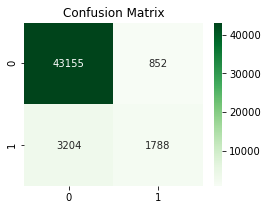

In [83]:
# Checking the confusion matrix after changing the cut-off value
confusion1 = metrics.confusion_matrix(y_train_pred_df.Churn, y_train_pred_df.predicted )

# Displaying a heatmap of the confusion matrix
plt.figure(figsize = (4,3))
plt.title('Confusion Matrix')
sns.heatmap(confusion1, annot = True, cmap = 'Greens' , fmt = 'g')
plt.show()

In [84]:
TP = confusion1[1,1] # true positive 
TN = confusion1[0,0] # true negatives
FP = confusion1[0,1] # false positives
FN = confusion1[1,0] # false negatives

# Calculating all the metrics
Sensitivity_train = round((TP / float(TP+FN)),3)
Specificity_train = round((TN / float(TN+FP)),3)
FPR_train = round(( FP/ float(TN+FP)),3)
Positive_predictive_value_train = round((TP / float(TP+FP)),3)
Negative_predictive_value_train = round((TN / float(TN+ FN)),3)
Precision_train = round(precision_score(y_train_pred_df.Churn, y_train_pred_df.predicted),3)
Recall_train = round(recall_score(y_train_pred_df.Churn, y_train_pred_df.predicted),3)
f1_score_train = round(2*(Precision_train*Recall_train)/(Precision_train+Recall_train),3)

# Printing all the metrics
print('Sensitivity :',Sensitivity_train)
print('Specificity :',Specificity_train)
print('False positive Rate :',FPR_train)
print('Positive predictive value :',Positive_predictive_value_train)
print('Negative predictive value :',Negative_predictive_value_train)

#Printing the precision and recall for the new model
print('Precision :',Precision_train)
print('Recall: ', Recall_train)
print('F1 Score: ', f1_score_train)

Sensitivity : 0.358
Specificity : 0.981
False positive Rate : 0.019
Positive predictive value : 0.677
Negative predictive value : 0.931
Precision : 0.677
Recall:  0.358
F1 Score:  0.468


#### Step 7.3.4: Plotting the ROC Curve

In [85]:
# Function to draw ROC curve
def draw_roc( actual, probs ):
    
    # Creating ROC curve for the model
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs, drop_intermediate = False )
    
    # Calculating the area under the ROC curve
    auc_score = metrics.roc_auc_score( actual, probs )
    
    # Plotting the ROC curve
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    
    # Plotting the diagonal dotted line at 45 degrees
    plt.plot([0, 1], [0, 1], 'k--')  
    
    # Setting the x and y limits and axis labels
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    
    # Setting the title and legend
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

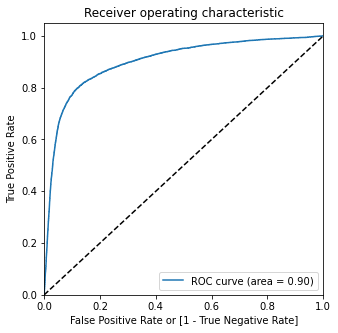

In [86]:
# Plotting the ROC curve
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_df.Churn, y_train_pred_df.Churn_Prob, drop_intermediate = False )
draw_roc(y_train_pred_df.Churn, y_train_pred_df.Churn_Prob)

#### Step 7.3.5: Finding Optimal Cutoff Point

##### Creating columns with different probability cutoffs 

In [87]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_df[i]= y_train_pred_df.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_df.head()

,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.006671,0,1,0,0,0,0,0,0,0,0,0
1,0,0.025550,0,1,0,0,0,0,0,0,0,0,0
2,0,0.017216,0,1,0,0,0,0,0,0,0,0,0
3,0,0.009823,0,1,0,0,0,0,0,0,0,0,0
4,0,0.089199,0,1,0,0,0,0,0,0,0,0,0


##### Ploting accuracy sensitivity and specificity graph for various probabilities.

In [88]:
# Calculating accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])

# num is the list of cutoff values
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

for i in num:
    # Calculating the confusion matrix 
    cm1 = metrics.confusion_matrix(y_train_pred_df.Churn, y_train_pred_df[i] )
    total1=sum(sum(cm1))
    
    # Calculating accuracy, specificity, sensitivity
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    
    # populating rows in the dataframe
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
    
# Displaying the final dataframe having metrics for all probabilities
cutoff_df

,probability,accuracy,sensitivity,specificity
0.0,0.0,0.101880,1.000000,0.000000
0.1,0.1,0.806486,0.854367,0.801054
0.2,0.2,0.885365,0.778045,0.897539
0.3,0.3,0.914468,0.691506,0.939760
0.4,0.4,0.921835,0.559495,0.962938
0.5,0.5,0.917223,0.358173,0.980639
0.6,0.6,0.907325,0.171074,0.990842
0.7,0.7,0.902569,0.076723,0.996251
0.8,0.8,0.899631,0.024239,0.998932
0.9,0.9,0.898386,0.003606,0.999886


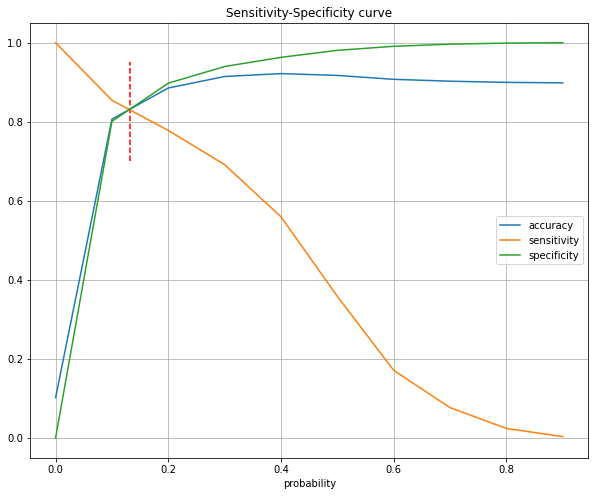

In [89]:
# Plotting accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'],figsize=(10,8))
plt.vlines(x=0.132, ymax=0.95, ymin=0.7, colors="r", linestyles="--")
plt.title('Sensitivity-Specificity curve')
plt.grid()
plt.show()

**Observations**
- The Specificity, Sensitivity and Accuracy curves intersect at probability =  0.132
- At this point, the values of all three metrics are close to 0.8, which is good.
- Hence, we will use 0.132 as the cut-off value for our model. 
- Rows having Churn probability >0.132 will be classified as 'Churn'

#### Step 7.3.6: Using 0.132 as the cut-off probability

In [90]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.132 else 0
y_train_pred_df['final_predicted'] = y_train_pred_df.Churn_Prob.map( lambda x: 1 if x > 0.132 else 0)
y_train_pred_df.head()

,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.006671,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.025550,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.017216,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.009823,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.089199,0,1,0,0,0,0,0,0,0,0,0,0


In [91]:
# Checking the overall accuracy.
print('Accuracy :',round(100*metrics.accuracy_score(y_train_pred_df.Churn, y_train_pred_df.final_predicted),2),'%')

Accuracy : 84.11 %


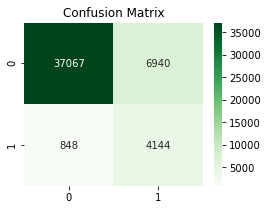

In [92]:
# Checking the confusion matrix after changing the cut-off value
confusion2 = metrics.confusion_matrix(y_train_pred_df.Churn, y_train_pred_df.final_predicted )

# Displaying a heatmap of the confusion matrix
plt.figure(figsize = (4,3))
plt.title('Confusion Matrix')
sns.heatmap(confusion2, annot = True, cmap = 'Greens' , fmt = 'g')
plt.show()

In [93]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

# Calculating all the metrics
Sensitivity_train = round((TP / float(TP+FN)),3)
Specificity_train = round((TN / float(TN+FP)),3)
FPR_train = round(( FP/ float(TN+FP)),3)
Positive_predictive_value_train = round((TP / float(TP+FP)),3)
Negative_predictive_value_train = round((TN / float(TN+ FN)),3)
Precision_train = round(precision_score(y_train_pred_df.Churn, y_train_pred_df.final_predicted),3)
Recall_train = round(recall_score(y_train_pred_df.Churn, y_train_pred_df.final_predicted),3)
f1_score_train = round(2*(Precision_train*Recall_train)/(Precision_train+Recall_train),3)

# Printing all the metrics
print('Sensitivity :',Sensitivity_train)
print('Specificity :',Specificity_train)
print('False positive Rate :',FPR_train)
print('Positive predictive value :',Positive_predictive_value_train)
print('Negative predictive value :',Negative_predictive_value_train)

#Printing the precision and recall for the new model
print('Precision :',Precision_train)
print('Recall: ', Recall_train)
print('F1 Score: ', f1_score_train)

Sensitivity : 0.83
Specificity : 0.842
False positive Rate : 0.158
Positive predictive value : 0.374
Negative predictive value : 0.978
Precision : 0.374
Recall:  0.83
F1 Score:  0.516


## Step 8: Model Evaluation

### Step 8.1: Create a final dataframe with Target Test dataset and predicted dataset

In [94]:
# Adding constant to the test dataset
X_test_sm = sm.add_constant(X_test_final[col])

In [95]:
# Making predictions on the test set
y_test_pred = res.predict(X_test_sm)

In [96]:
# Converting y_test_pred to a dataframe 
y_pred_df = pd.DataFrame(y_test_pred)
y_pred_df.head()

,0
0,0.009434
1,0.587389
2,0.315143
3,0.001258
4,0.001944


In [97]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [98]:
# Resetting index for both dataframes to append them
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [99]:
# Appending y_test_df and y_pred_df
y_test_pred_df = pd.concat([y_test_df, y_pred_df],axis=1)

# Renaming the Churn probability column 
y_test_pred_df= y_test_pred_df.rename(columns={ 0 : 'Churn_Prob', 'churn_probability':'Churn'})

# Creating new column 'final_predicted' with 1 if Churn_Prob > 0.132 else 0
y_test_pred_df['final_predicted'] = y_test_pred_df.Churn_Prob.map(lambda x: 1 if x > 0.132 else 0)
y_test_pred_df.head()

,Churn,Churn_Prob,final_predicted
0,0,0.009434,0
1,1,0.587389,1
2,0,0.315143,1
3,0,0.001258,0
4,0,0.001944,0


All the converted and the predicted values are present in the y_pred_final. <br>
Now we will check the metrics for the predicted values of test dataset.

### Step 8.2: Check the metrics for predicted values

In [100]:
# Checking the overall accuracy.
print('Accuracy :',round(100*metrics.accuracy_score(y_test_pred_df.Churn, y_test_pred_df.final_predicted),2),'%')

Accuracy : 84.8 %


In [101]:
# Checking the confusion Matrix
confusion3 = metrics.confusion_matrix(y_test_pred_df.Churn, y_test_pred_df.final_predicted )
confusion3

array([[16027,  2833],
       [  359,  1781]], dtype=int64)

In [102]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [103]:
# Calculating all the metrics
Sensitivity_test = round((TP / float(TP+FN)),3)
Specificity_test = round((TN / float(TN+FP)),3)
FPR_test= round(( FP/ float(TN+FP)),3)
Positive_predictive_value_test = round((TP / float(TP+FP)),3)
Negative_predictive_value_test = round((TN / float(TN+ FN)),3)
Precision_test = round(precision_score(y_test_pred_df.Churn, y_test_pred_df.final_predicted),3)
Recall_test = round(recall_score(y_test_pred_df.Churn, y_test_pred_df.final_predicted),3)
f1_score_test = round(2*(Precision_test*Recall_test)/(Precision_test+Recall_test),3)

# Printing all the metrics
print('Sensitivity :',Sensitivity_test)
print('Specificity :',Specificity_test)
print('False positive Rate :',FPR_test)
print('Positive predictive value :',Positive_predictive_value_test)
print('Negative predictive value :',Negative_predictive_value_test)

#Printing the precision and recall for the new model
print('Precision :',Precision_test)
print('Recall: ', Recall_test)
print('F1 Score: ', f1_score_test)

Sensitivity : 0.832
Specificity : 0.85
False positive Rate : 0.15
Positive predictive value : 0.386
Negative predictive value : 0.978
Precision : 0.386
Recall:  0.832
F1 Score:  0.527


### Step 13: Creating a submission file for unseen dataset using model built through principal components

In [104]:
# Printing the columns used for model built through PCA
col

Index(['PC0', 'PC1', 'PC3', 'PC4', 'PC5', 'PC6', 'PC8', 'PC9', 'PC11', 'PC12',
       'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20', 'PC21', 'PC22',
       'PC24', 'PC25', 'PC26', 'PC28', 'PC29', 'PC30', 'PC31', 'PC33', 'PC36',
       'PC38', 'PC40', 'PC45', 'PC47', 'PC48', 'PC49', 'PC50', 'PC52', 'PC54',
       'PC55', 'PC56', 'PC57', 'PC58', 'PC59', 'PC61', 'PC62', 'PC63', 'PC64',
       'PC65'],
      dtype='object')

In [105]:
# Applying PCA Transform on unseen dataset
unseen_pca2 = pca_2.transform(unseen)
unseen_final=pd.DataFrame(unseen_pca2)
unseen_final.columns=col_fill(unseen_pca2.shape[1])
unseen_final.head()

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60,PC61,PC62,PC63,PC64,PC65
0,-4.744315,-0.536972,-1.310350,-0.607781,-0.318269,-0.237333,0.077873,-0.855445,-0.230319,0.230730,1.005661,-0.406905,-0.149969,0.227986,-0.615681,2.156846,2.843825,1.043292,0.155895,2.067117,2.029237,0.055965,2.523530,-0.238966,-0.169274,-0.335719,-0.271324,-0.512664,0.229983,-1.360718,-0.162005,0.215176,-0.484446,1.685842,-0.721895,-0.170335,-0.230385,-0.172644,-0.128897,0.194342,-0.044032,-0.048997,0.043260,0.142608,0.081017,0.281011,0.256818,0.060226,0.245941,0.147362,0.013904,0.002683,0.122259,-0.265779,-0.222205,0.442591,-0.497248,0.035748,0.174822,0.042862,-0.249472,0.192333,-0.052248,0.447783,0.548987,-0.207671
1,4.642472,-2.642865,-1.124197,-1.594830,-3.356696,0.243593,-2.895524,-1.255385,-1.067907,-1.609441,5.649394,-1.513436,-0.042602,-2.377482,1.443421,-2.203234,-3.586471,-1.159764,0.467804,-1.171078,0.054942,-0.322615,3.209239,0.247079,0.291994,-0.924782,-0.572691,0.532407,0.171861,0.963777,0.392498,0.066125,0.472275,1.186262,1.842127,0.087030,-0.013762,0.294660,-0.364313,0.537486,0.068478,0.036591,0.280109,-1.072872,1.018769,0.487764,0.997791,-1.225010,-0.138070,0.681666,0.039022,0.113635,0.190903,-0.027171,0.771281,-1.129584,-0.829810,0.234667,0.066172,0.413294,-0.290787,-0.039307,-0.640340,-0.306274,0.176636,0.467371
2,-1.909532,1.470591,5.411859,0.105083,-3.425378,0.597738,-1.318369,5.990287,-2.315002,2.436447,0.336170,2.464628,-0.092951,0.394829,0.382513,1.195726,-0.902691,1.596210,-2.083700,-0.578395,0.501295,0.636888,0.048180,-0.311859,-0.246974,0.646922,1.135510,0.097743,0.509151,-0.189567,-0.112132,-0.147003,0.680603,-0.388995,0.075942,0.205075,0.367573,-0.565407,0.239090,0.339438,-0.225612,2.718600,2.232252,-0.643878,1.066037,0.057726,-0.630390,0.107937,0.456754,0.082464,0.220764,0.645122,0.150123,-0.159703,2.928223,-2.237045,-2.920782,1.242613,0.473456,-0.430748,-0.112914,-0.113434,0.063197,-0.207499,0.464124,-0.280326
3,0.384753,-3.649321,-2.630749,0.694832,2.142926,0.007551,0.412499,-0.938366,-2.251342,-0.248950,-0.816531,2.710544,2.234478,-0.738112,3.450384,-0.556264,-1.408045,-2.984721,-0.101921,0.304603,2.032639,-0.732169,-0.792692,0.580643,-0.827204,-0.035306,0.938401,2.071345,0.224374,-1.556585,-0.554814,-0.107719,-0.666870,-0.549118,-0.615373,0.138539,-0.470929,-0.530021,0.561134,-0.228989,0.559756,-0.633554,-0.573464,0.104919,-0.003835,-0.180113,-1.573547,1.009802,0.674261,0.458160,-0.382534,-0.126149,-0.239600,0.049120,0.086838,0.159725,0.071237,0.896583,-0.159885,0.399163,0.239222,-0.027152,0.238367,0.149392,-0.084379,0.003169
4,1.868427,8.404304,-0.099728,2.604248,-0.066862,-0.639446,6.201654,-0.679944,1.344600,-0.564818,-0.715184,-0.771678,-1.253249,-2.761765,-0.370638,0.777013,-1.005046,-0.543076,-0.325543,0.388059,-0.521825,0.727898,-0.181358,0.424093,0.647888,1.839722,0.867226,-0.027558,1.076494,1.378755,-0.713796,-0.963005,-0.139789,0.065783,-0.286062,1.240491,-0.639528,-0.962886,0.683191,-0.300135,-0.254655,0.161475,-0.035387,0.399380,-0.871389,-0.408747,0.115972,0.089839,0.113731,-0.012037,0.620716,-0.758624,-0.051079,0.297796,-0.350534,-0.157942,-0.118930,-0.235016,0.078893,-0.100775,0.032578,-0.081362,0.373253,-0.295742,-0.125178,0.002328


In [106]:
# Adding constant to the unseen dataset
unseen_sm = sm.add_constant(unseen_final[col])

# Making predictions on the unseen set
unseen_pred = res.predict(unseen_sm)

# Converting unseen_pred to a dataframe 
unseen_pred_df = pd.DataFrame(unseen_pred)
unseen_pred_df.head()

,0
0,0.009543
1,0.023250
2,0.539812
3,0.012228
4,0.016619


In [107]:
# Adding id column to the dataframe for submission
unseen_pred_df['id']=unseen_df.id

# Renaming the columns
unseen_pred_df= unseen_pred_df.rename(columns={ 0 : 'predicted_probability'})

# Creating new column 'churn_probability' with 1 if Churn_Prob > 0.133 else 0
unseen_pred_df['churn_probability'] = unseen_pred_df.predicted_probability.map(lambda x: 1 if x > 0.132 else 0)

In [108]:
# Exporting the dataframe to csv
unseen_pred_df[['id','churn_probability']].to_csv(r'submission.csv',index=False,header=True)

## <font color='purple'>Section 2: Building a model to find the important features for predicting the target.</fon>

## Step 9: Applying RFECV on the model to get the optimum number of features

In [109]:
# Creating a LogisticRegression object
logreg = LogisticRegression(random_state=42)

# Creating a RFECV object on logreg
rfecv = RFECV(estimator=logreg, cv=4, n_jobs=-1)

In [110]:
%%time
# Applying RFECV fit to train dataset
rfecv.fit(X_train, y_train)

Wall time: 4min 12s


RFECV(cv=4, estimator=LogisticRegression(random_state=42), n_jobs=-1)

In [111]:
# Checking the scores of the columns in the dataset
rfecv.grid_scores_[:,3]

array([0.89811413, 0.89811413, 0.89811413, 0.89811413, 0.89811413,
       0.89803249, 0.89811413, 0.92113642, 0.92015675, 0.9063597 ,
       0.92072822, 0.9186056 , 0.91623806, 0.91615642, 0.91738101,
       0.91746265, 0.91746265, 0.91738101, 0.91664626, 0.9167279 ,
       0.91640134, 0.91762593, 0.91827904, 0.91787085, 0.91876888,
       0.91893216, 0.91852396, 0.91803413, 0.9190138 , 0.91868724,
       0.9186056 , 0.91909544, 0.91868724, 0.91893216, 0.91917708,
       0.92015675, 0.92023839, 0.92032003, 0.91983019, 0.92007511,
       0.92015675, 0.92097314, 0.91925871, 0.91697281, 0.91705445,
       0.91697281, 0.91738101, 0.91640134, 0.91656462, 0.91680954,
       0.91640134, 0.91623806, 0.9159115 , 0.9159115 , 0.9159115 ,
       0.91607478, 0.91599314, 0.91582986, 0.91574822, 0.9159115 ,
       0.91656462, 0.91648298, 0.91656462, 0.91640134, 0.91640134,
       0.91680954, 0.91689117, 0.91697281, 0.91664626, 0.91689117,
       0.91656462, 0.91640134, 0.91615642, 0.91648298, 0.91664

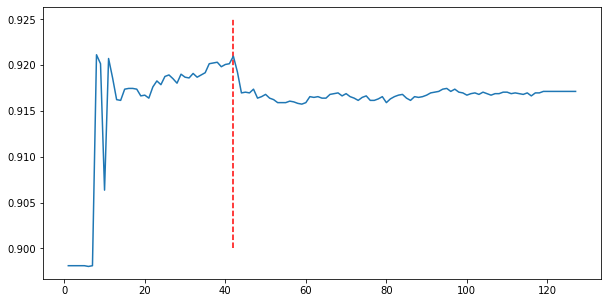

In [112]:
# Plotting the accuracy score with the number of features
plt.figure(figsize=[10, 5])
plt.plot(range(1, X_train.shape[1]+1),rfecv.grid_scores_[:,3])
plt.vlines(x=42, ymax=0.925, ymin=0.9, colors="r", linestyles="--")
plt.show()

**Observations:**
- We can Observe that using RFECV using around 42 features give an accuracy of around 92 %.
- Hence, we will go ahead and those features and build a logistic Regression model on this and determine top featues which predict if the customers will churn or not.

In [113]:
# Printing the number of optimal features selected by RFECV
rfecv.n_features_

42

In [114]:
# Applying RFECV Transform on Train dataset
X_train_rfecv=pd.DataFrame(rfecv.transform(X_train))
X_train_rfecv.columns=X_train.columns[rfecv.support_]
    
# Applying RFECV Transform on Train dataset
X_test_rfecv=pd.DataFrame(rfecv.transform(X_test))
X_test_rfecv.columns=X_test.columns[rfecv.support_]

In [115]:
# Displaying the list of columns selected by RFE and the ranking
list(zip(X_train.columns, rfecv.support_, rfecv.ranking_))

[('arpu_6', True, 1),
 ('arpu_7', True, 1),
 ('arpu_8', False, 19),
 ('onnet_mou_6', False, 4),
 ('onnet_mou_7', True, 1),
 ('onnet_mou_8', True, 1),
 ('offnet_mou_6', False, 51),
 ('offnet_mou_7', True, 1),
 ('offnet_mou_8', True, 1),
 ('roam_ic_mou_6', False, 61),
 ('roam_ic_mou_7', False, 36),
 ('roam_ic_mou_8', False, 60),
 ('roam_og_mou_6', False, 6),
 ('roam_og_mou_7', False, 37),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2t_mou_6', False, 28),
 ('loc_og_t2t_mou_7', False, 52),
 ('loc_og_t2t_mou_8', True, 1),
 ('loc_og_t2m_mou_6', False, 20),
 ('loc_og_t2m_mou_7', True, 1),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_6', False, 25),
 ('loc_og_t2f_mou_7', False, 76),
 ('loc_og_t2f_mou_8', False, 38),
 ('loc_og_t2c_mou_6', False, 68),
 ('loc_og_t2c_mou_7', False, 34),
 ('loc_og_t2c_mou_8', False, 58),
 ('loc_og_mou_6', False, 21),
 ('loc_og_mou_7', False, 3),
 ('loc_og_mou_8', True, 1),
 ('std_og_t2t_mou_6', False, 5),
 ('std_og_t2t_mou_7', False, 35),
 ('std_og_t2t_mou_8', Tru

In [116]:
# Retaining the columns selected by RFE in the training dataset
cols_rfe= X_train_rfecv.columns

# Displaying the columns that were not selected by RFE
X_train.columns[rfecv.support_]

Index(['arpu_6', 'arpu_7', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_7',
       'offnet_mou_8', 'roam_og_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_7',
       'loc_og_t2m_mou_8', 'loc_og_mou_8', 'std_og_t2t_mou_8', 'spl_og_mou_8',
       'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_8',
       'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_7', 'loc_ic_mou_8',
       'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8', 'std_ic_mou_8',
       'total_ic_mou_6', 'total_ic_mou_8', 'spl_ic_mou_7', 'spl_ic_mou_8',
       'ic_others_8', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'max_rech_amt_7', 'max_rech_amt_8', 'days_since_last_rech_8',
       'last_day_rch_amt_6', 'last_day_rch_amt_8', 'vol_2g_mb_8',
       'vol_3g_mb_8', 'monthly_3g_7', 'aon'],
      dtype='object')

**Observations:**
- We have the selected 42 columns from RFECV. Now we will build a model using these selected features to find the important features for predicting the churn probability.

## Step 10:Model Building

### Step 10.1: Running first model after RFECV

In [117]:
X_train_sm = sm.add_constant(X_train_rfecv)
logreg_m1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial(),random_state=42)
res2 = logreg_m1.fit()

In [118]:
# Displaying the model summary
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                48999
Model:                            GLM   Df Residuals:                    48956
Model Family:                Binomial   Df Model:                           42
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10067.
Date:                Wed, 27 Oct 2021   Deviance:                       20134.
Time:                        13:12:12   Pearson chi2:                 3.69e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -4.0272      0.047    -86.523      0.000      -4.118      -3.936
arpu_6                     0.2952      0.059      5.030      0.000       0.180       0.410
arpu_7                     0.2429      0.069      3.535      0.000       0.108       0.378
onnet_mou_7                0.2277      0.050      4.526      0.000       0.129       0.326
onnet_mou_8               -0.1963      0.108     -1.815      0.069      -0.408       0.016
offnet_mou_7               0.2375      0.057      4.165      0.000       0.126       0.349
offnet_mou_8              -0.3076      0.074     -4.156      0.000      -0.453      -0.163
roam_og_mou_8              0.3227      0.018     17.940      0.000       0.287       0.358
loc_og_t2t_mou_8          -0.2681      0.093     -2.876      0.004      -0.451      -0.085
loc_og_t2m_mou_7          -0.0966      0.049     -1.977      0.048      -0.192      -0.001
loc_og_t2m_mou_8          -0.3548      0.153     -2.318      0.020      -0.655      -0.055
loc_og_mou_8               0.2455      0.194      1.269      0.204      -0.134       0.625
std_og_t2t_mou_8          -0.2009      0.099     -2.024      0.043      -0.395      -0.006
spl_og_mou_8              -0.1278      0.029     -4.469      0.000      -0.184      -0.072
total_og_mou_7            -0.3411      0.072     -4.728      0.000      -0.482      -0.200
total_og_mou_8             0.2894      0.097      2.976      0.003       0.099       0.480
loc_ic_t2t_mou_8          -0.8361      0.087     -9.587      0.000      -1.007      -0.665
loc_ic_t2m_mou_8          -1.5003      0.111    -13.528      0.000      -1.718      -1.283
loc_ic_t2f_mou_8          -0.4511      0.052     -8.670      0.000      -0.553      -0.349
loc_ic_mou_7               0.1093      0.052      2.114      0.034       0.008       0.211
loc_ic_mou_8               0.4825      0.172      2.812      0.005       0.146       0.819
std_ic_t2m_mou_8          -0.1112      0.059     -1.889      0.059      -0.227       0.004
std_ic_t2f_mou_8          -0.2614      0.043     -6.029      0.000      -0.346      -0.176
std_ic_mou_8              -0.1982      0.068     -2.915      0.004      -0.332      -0.065
total_ic_mou_6             0.1583      0.033      4.858      0.000       0.094       0.222
total_ic_mou_8             0.1987      0.094      2.113      0.035       0.014       0.383
spl_ic_mou_7              -0.1244      0.022     -5.715      0.000      -0.167      -0.082
spl_ic_mou_8              -0.6539      0.046    -14.203      0.000      -0.744      -0.564
ic_others_8               -0.2180      0.035     -6.162      0.000      -0.287      -0.149
total_rech_num_7          -0.1619      0.035     -4.605      0.000      -0.231      -0.093
total_rech_num_8          -0.7089      0.046    -15.342      0.000      -0.799  

In [119]:
# Calculating the VIF for the model
vif = pd.DataFrame()
vif['Features'] = X_train_rfecv.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfecv.values, i) for i in range(X_train_rfecv.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
19,loc_ic_mou_8,34.78
10,loc_og_mou_8,31.96
14,total_og_mou_8,23.97
9,loc_og_t2m_mou_8,21.66
3,onnet_mou_8,21.54
13,total_og_mou_7,20.33
1,arpu_7,15.30
31,total_rech_amt_7,15.14
24,total_ic_mou_8,14.87
5,offnet_mou_8,13.87


In [120]:
# Predicting the Churn probability using the model and storing it in a dataframe
y_train_pred2 = res2.predict(X_train_sm).values.reshape(-1)
y_train_pred_df2 = pd.DataFrame({'Churn':y_train.churn_probability, 'Churn_Prob':y_train_pred2})

In [121]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_df2['predicted'] = y_train_pred_df2.Churn_Prob.map(lambda x: 1 if x > 0.132 else 0)

# Displaying the accuracy
print('Accuracy :',round(100*metrics.accuracy_score(y_train_pred_df2.Churn, y_train_pred_df2.predicted),2),'%')

Accuracy : 84.6 %


Dropping high VIF value columns

In [122]:
# Dropping columns with high VIF
cols_rfe=cols_rfe.drop(vif[vif.VIF>6].Features.values,1)

### Step 10.2: Running second model

In [123]:
X_train_sm = sm.add_constant(X_train_rfecv[cols_rfe])
logreg_m2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial(),random_state=42)
res2 = logreg_m2.fit()

In [124]:
# Displaying the model summary
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                48999
Model:                            GLM   Df Residuals:                    48975
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10618.
Date:                Wed, 27 Oct 2021   Deviance:                       21236.
Time:                        13:12:21   Pearson chi2:                 1.71e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -3.8666      0.043    -89.116      0.000      -3.952      -3.782
roam_og_mou_8              0.4339      0.015     28.375      0.000       0.404       0.464
loc_og_t2m_mou_7          -0.1541      0.036     -4.329      0.000      -0.224      -0.084
spl_og_mou_8              -0.1644      0.028     -5.790      0.000      -0.220      -0.109
loc_ic_t2t_mou_8          -0.8590      0.054    -15.839      0.000      -0.965      -0.753
loc_ic_t2f_mou_8          -0.5885      0.053    -11.129      0.000      -0.692      -0.485
loc_ic_mou_7              -0.2673      0.043     -6.151      0.000      -0.352      -0.182
std_ic_t2m_mou_8          -0.3028      0.031     -9.872      0.000      -0.363      -0.243
std_ic_t2f_mou_8          -0.3574      0.043     -8.279      0.000      -0.442      -0.273
total_ic_mou_6             0.2971      0.028     10.438      0.000       0.241       0.353
spl_ic_mou_7              -0.1708      0.021     -8.015      0.000      -0.213      -0.129
spl_ic_mou_8              -0.6995      0.047    -15.011      0.000      -0.791      -0.608
ic_others_8               -0.2514      0.035     -7.120      0.000      -0.321      -0.182
total_rech_num_7           0.2513      0.025     10.189      0.000       0.203       0.300
total_rech_num_8          -0.8028      0.036    -22.580      0.000      -0.873      -0.733
max_rech_amt_7            -0.1730      0.023     -7.434      0.000      -0.219      -0.127
max_rech_amt_8            -0.2998      0.031     -9.647      0.000      -0.361      -0.239
days_since_last_rech_8     0.0506      0.017      2.927      0.003       0.017       0.085
last_day_rch_amt_6         0.0444      0.021      2.147      0.032       0.004       0.085
last_day_rch_amt_8        -0.6062      0.036    -16.881      0.000      -0.677      -0.536
vol_2g_mb_8               -0.2977      0.034     -8.882      0.000      -0.363      -0.232
vol_3g_mb_8               -0.2564      0.038     -6.796      0.000      -0.330      -0.182
monthly_3g_7               0.1684      0.024      7.003      0.000       0.121       0.216
aon                       -0.4065      0.023    -17.617      0.000      -0.452      -0.361
==========================================================================================
"""

In [125]:
# Calculating the VIF for the model
vif = pd.DataFrame()
vif['Features'] = X_train_rfecv[cols_rfe].columns
vif['VIF'] = [variance_inflation_factor(X_train_rfecv[cols_rfe].values, i) for i in range(X_train_rfecv[cols_rfe].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,loc_ic_mou_7,3.88
13,total_rech_num_8,2.62
8,total_ic_mou_6,2.62
15,max_rech_amt_8,2.45
12,total_rech_num_7,2.15
1,loc_og_t2m_mou_7,1.95
18,last_day_rch_amt_8,1.80
14,max_rech_amt_7,1.77
3,loc_ic_t2t_mou_8,1.76
20,vol_3g_mb_8,1.44


In [126]:
# Predicting the Churn probability using the model and storing it in a dataframe
y_train_pred2 = res2.predict(X_train_sm).values.reshape(-1)
y_train_pred_df2 = pd.DataFrame({'Churn':y_train.churn_probability, 'Churn_Prob':y_train_pred2})

In [127]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_df2['predicted'] = y_train_pred_df2.Churn_Prob.map(lambda x: 1 if x > 0.132 else 0)

# Displaying the accuracy
print('Accuracy :',round(100*metrics.accuracy_score(y_train_pred_df2.Churn, y_train_pred_df2.predicted),2),'%')

Accuracy : 83.06 %


**Observations:**
- All the features have VIF<5 and p-value<0.05. We have built a good model with accuracy greater than 90%. Hence, we can go ahead and determine the feature importance using this model.
- We have not tried to find the optimal cut off point for this model as this has nothing to do on building the model rather than just converting the predicted probalities to 1(Churn) or 0(Not Churn).

## Step 12: Determining Feature Importance

#### Selecting the coefficients and their features from our final model 

In [128]:
# Converting the model parameters to a dictionary
d = dict(round(res2.params,3))

# Converting dictionary to a dataframe and sorting with absolute of coefficients
Imp_features_df = pd.DataFrame(sorted(d.items(), key=lambda x: abs(x[1]), reverse=True))
Imp_features_df.rename(columns = {0: 'colname', 1 :'coefficient' }, inplace = True)
Imp_features_df=Imp_features_df[~(Imp_features_df['colname']=='const')]
Imp_features_df

,colname,coefficient
1,loc_ic_t2t_mou_8,-0.859
2,total_rech_num_8,-0.803
3,spl_ic_mou_8,-0.699
4,last_day_rch_amt_8,-0.606
5,loc_ic_t2f_mou_8,-0.588
6,roam_og_mou_8,0.434
7,aon,-0.406
8,std_ic_t2f_mou_8,-0.357
9,std_ic_t2m_mou_8,-0.303
10,max_rech_amt_8,-0.300


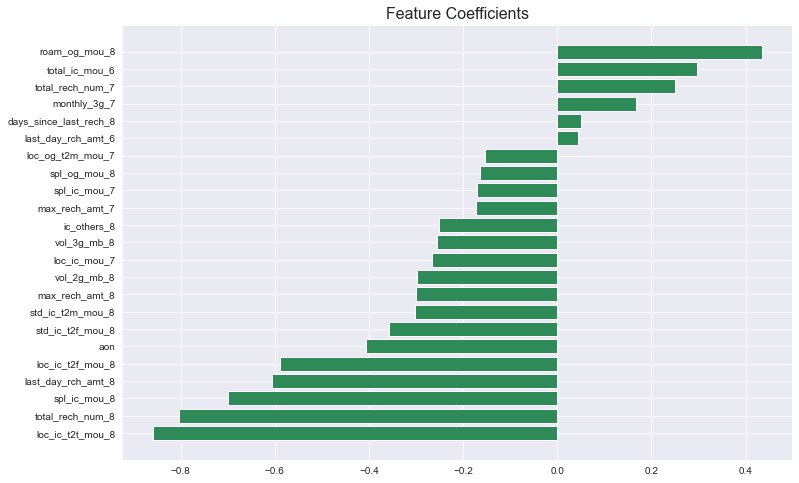

In [129]:
# Plotting a bargraph for the coefficients of the final model
fig1 = plt.figure(figsize = (12,8))
sns.set_style("darkgrid")
df=Imp_features_df.sort_values(by='coefficient')
ax = fig1.add_subplot(1, 1, 1)
ax.barh(df.colname,df.coefficient,color='seagreen')
plt.title('Feature Coefficients',fontdict = {'fontsize':16})
plt.show()

### 13.1: Interpreting the Logistic Regression Model

The equation for multivariate logistic regression is

$  \large \qquad\quad\qquad\quad\qquad\quad\qquad\quad \text{P} = \frac{1}{1 + e^-(\beta_0 + \beta_1X_1 + \beta_2X_2 + ... \beta_kX_k) } $

where P is the probability and $ X_1, X_2, $ etc are the variables. <br><br> We can convert this equation to log odds for better interpretability:

$ \large \qquad\quad\qquad\quad\qquad\quad\qquad\quad ln\left ( \frac{P}{1-P} \right ) = \beta_0 + \beta_1X_1 + \beta_2X_2 + ... \beta_kX_k  $

<br>The odds of converting  (P/1-P) indicates how much more likely a person is to Churn than to not churn to another operator.
<br>For example, if a person has odds of churn = 3, it means that the person is 3 times more likely to churn.
<br>In other words, P(Churn) = 3*P(No Churn)<br><br>
<br>Hence the the Equation for our final model will be:

 $ \boxed{ Ln\left(\frac{P}{1-P}\right) =-3.866 - (0.859 \times \text{loc_ic_t2t_mou_8}) - (0.803 \times \text{ total_rech_num_8})  - (0.699 \times \text{ spl_ic_mou_8}) 
\qquad\qquad \quad\quad - (0.606 \times \text{last_day_rch_amt_8l}) - (0.588 \times \text{ loc_ic_t2f_mou_8}) 
 +  (0.434 \times \text{roam_og_mou_8}) 
 \qquad\qquad \quad\quad - (0.406 \times \text{ aon})  - (0.357 \times \text{ std_ic_t2f_mou_8})  - (0.303 \times \text{ std_ic_t2m_mou_8}) 
\qquad\qquad \quad\quad - (0.300 \times \text{ max_rech_amt_8}) - (0.298 \times \text{ vol_2g_mb_8})  
 + (0.297 \times \text{ total_ic_mou_6}) 
 \qquad\qquad \quad\quad- (0.267 \times \text{ loc_ic_mou_7})  - (0.256 \times \text{ vol_3g_mb_8})  - (0.251 \times \text{ ic_others_8})  
\qquad\qquad \quad\quad + (0.251 \times \text{ total_rech_num_7})  - (0.173 \times \text{ max_rech_amt_7})
- (0.171 \times \text{ spl_ic_mou_7})
\qquad\qquad \quad\quad + (0.168 \times \text{ monthly_3g_7}) - (0.164 \times \text{ spl_og_mou_8})  - (0.154 \times \text{ loc_og_t2m_mou_7	})
\qquad\qquad \quad\quad + (0.051 \times \text{ date_of_last_rech_8})  + (0.044 \times \text{ last_day_rch_amt_6	}) }$

## Step 14: Conclusion

-  We have built a logistic regression model that classifies if a customer will churn or on in the based on various parameters like loc_ic_t2t_mou_8, total_rech_num_8, spl_ic_mou_8 etc..
- Currently we have a cutoff of 0.132. That is, customers with a probability greater than 0.132 are are classified to 'Churn', whereas customers with probability less than or equal to 0.132 are not classified to be churning.
- The logistic regression model performs well on both train and test datasets. Although the precision is low, we are more concerned on identifying the customers at high risk of churn. Hence, Sensitivity/Recall will be the appropriate metric for this problem statement.


Following are the metrics:<br><br>

**Model performance on Train Dataset:**
- Accuracy : 84.11 %
- Sensitivity : 0.83
- Specificity : 0.842
- Precision : 0.374
- Recall : 0.83
- F1 Score: 0.516


<br>**Model performance on Test Dataset:**
- Accuracy : 84.8 %
- Sensitivity : 0.832
- Specificity : 0.85
- Precision : 0.386
- Recall:  0.832
- F1 Score:  0.527

**The Top most important features that indicate if a customer will churn or not are:**
1. `loc_ic_t2t_mou_8` - Negative coefficient of -0.859. This means that if the local incoming calls are high then the customer is less likely to churn. We can also interpret that the customer likes the current network he/she is using and is not facing any issues.
2. `total_rech_num_8` - Negative coefficient of -0.803. This implies that customer with high recharge counts are less likely to churn and also means that the recharge offers provided by the telecom company is good.
3. `spl_ic_mou_8` - Negative coefficient of -0.699. This indicates that if the special incoming calls are high then the customer is less likely to churn.
4. `last_day_rch_amt_8` - Negative coeffiecient of -0.606. This implies that if the last day recharge amount is high then the customer is less likely to churn. Which means that if a customer has recharged some amount then it would be a loss for him to change to another operator and hence wont churn.
5. `loc_ic_t2f_mou_8` - Negative coefficient of -0.588. This means that if the incoming calls from telecom operator to fixed lines is high then the customer is less likely to churn.
6. `roam_og_mou_8` - Positive coefficient of 0.434. This means that as the outgoing calls while roaming increases the customer is more likely to churn. This might be because the cost of roaming calls is high and the customers are not satisfied with the prices.

**Next steps for Telecom Industry**

- In order to Minimize the churn rate, the telecom companies needs to focus on the leads with following patterns:
    - Local/Special Incoming call minutes
    - Number of times Recharged
    - Recharge amount on last day of month
    - Outgoing roaming call minutes
- If the local or special incoming calls to the customer have decreased then the customer is more likely to churn that month. The telecom company can provide offers on new packs which includes unlimited or free incoming calls or reduce the prices on the incoming calls.
- If the Recharge count done to a number for a particular month is Low. This means the customers are not interested in the offers provided by the telecom operators and will be churning to claim new offers from other operators. Hence, the company must provide better recharge packages and offers to these customer to prevent from churning.
- It is also observed that if the recharge amount done on the last day of month is low then the customers might churn. To reduce this the operators can offer a month end offers on packs. Which will keep them hooked to this telecom operator and also advertise these packs to reach more customers.
- We can also observe that if the customer makes high roaming outgoing calls then the cost for those calls is also high. It seems like these customers keep travelling. This might effect the prices for recharge on roaming. The company can pick these type of customers and provide focused plans on roaming to keep them from Churning.